In [1]:
import P_Aguacate as P

**********************************
Cargando fichero :datos/avocado.csv
numero Registros :18249
numero Columnas :14
**********************************




/home/jbentezag/.local/lib/python3.8/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


In [2]:
P.DOC()

# Análisis del Conjunto de Datos de Precios de Aguacate

**Conjunto de Datos de Precios de Aguacate**: El conjunto de datos 'Precios de Aguacate', obtenido de Kaggle, es un conjunto de datos ampliamente utilizado para proyectos de análisis de datos y aprendizaje automático. Proporciona datos históricos sobre precios y ventas de aguacates en varias regiones de los Estados Unidos. Este conjunto de datos es valioso para entender las tendencias en los precios de los aguacates, los volúmenes de ventas y su relación con diferentes factores.

## Atributos Clave

- **Columnas**: El conjunto de datos incluye varias columnas de información. Algunas de las columnas clave típicamente encontradas en este conjunto de datos incluyen:
    - **Fecha** (`Date`): La fecha de observación.
    - **Precio Promedio** (`AveragePrice`): El precio promedio de los aguacates.
    - **Volumen Total** (`Total Volume`): El volumen total de aguacates vendidos.
    - **4046**: Volumen de aguacates Hass pequeños vendidos.
    - **4225**: Volumen de aguacates Hass grandes vendidos.
    - **4770**: Volumen de aguacates Hass extra grandes vendidos.
    - **Bolsas Totales** (`Total Bags`): Total de bolsas de aguacates vendidas.
    - **Bolsas Pequeñas** (`Small Bags`): Bolsas de aguacates pequeños vendidas.
    - **Bolsas Grandes** (`Large Bags`): Bolsas de aguacates grandes vendidas.
    - **Bolsas Extra Grandes** (`XLarge Bags`): Bolsas de aguacates extra grandes vendidas.
    - **Tipo** (`Type`): El tipo de aguacates, generalmente categorizados como convencionales u orgánicos.
    - **Región** (`Region`): La región o ciudad dentro de los Estados Unidos donde se registraron los datos.

- **Rango de Fechas**: El conjunto de datos abarca un rango de fechas, lo que permite el análisis de series de tiempo. Puedes examinar cómo cambian los precios y ventas de aguacates a lo largo de diferentes estaciones y años.

- **Regiones**: Se proporciona información para varias regiones o ciudades a través de los Estados Unidos, lo que permite el análisis de variaciones de precios y ventas en diferentes mercados.

- **Tipos**: El conjunto de datos distingue entre diferentes tipos de aguacates, como convencionales y orgánicos, lo que puede ser útil para comparar tendencias de precios entre estas categorías.

- **Volumen**: Están disponibles datos sobre el volumen total de aguacates vendidos. Esta métrica de volumen se utiliza a menudo para analizar la demanda del mercado.

- **Precio Promedio**: El conjunto de datos contiene el precio promedio de los aguacates, una métrica fundamental para entender las tendencias de precios.

## Casos de Uso

- Este conjunto de datos se utiliza comúnmente para aprender y practicar el análisis de datos, visualización de datos y modelado de regresión en proyectos de ciencia de datos y aprendizaje automático.

- Sirve como un recurso valioso para entender cómo trabajar con datos del mundo real, extraer conocimientos y tomar decisiones basadas en datos.

---


In [3]:
P.Inicio()
#P.DatosORG
#P.DatosRegionClasificacionVolumen


**********************************
Cargando fichero :datos/avocado.csv
numero Registros :18249
numero Columnas :14
**********************************





- **Añade las siguientes columnas a la tabla**: 
    - **CalFecha:** Convierte el campo dato de un string con formato yyyy-mm-dd 
    - **CalYear:** Componente Year de la fecha
    - **CalMes:** Componente Mes de la fecha  

- **Columnas FECHA formato numerico para los modelos de entrenamiento**: 
    - **Cal_AAAAMM:** 
    - **Cal_AAAA:** 
    - **Cal_MM:** 
    - **Cal_MM:** 
    - **Cal_SS:** 
    - **Cal_DDD:** 
    - **Cal_AAAADDD:** 

- **Columnas NORMALIZADAS para los modelos de entrenamiento**: 
    - **CalNOR_Z_TotalVolume:**  Z-Score Normalization
    - **CalNOR_MM_TotalVolume:**  Min-Max Normalization
    - **Cal_NOR_MM_AAAADDD:**  Min-Max Normalization para DDD entre 1 y 1000

    
    
**Validaciónes**  
  **errores_conversion CalFecha:** 0



- **PreparacionDatosSegmentacion** Añade las siguientes columnas de Segmentación a la tabla: 
    - **CalRegionGrupo:** Agrupación de region en `City,Region,GreaterRegion,TotalUS`
    - **CalEstacion:** Estación del año para ese mes, `Verano,Otoño etc`
    


- **PreparacionDatosClasificacionVolumen**  A partir del volumen, calcula el peso de cada region
    - **CalRegion_Total_Volume:** Total Volumen de la región
    - **CalRegion_Porcentaje:** Porcentaje sobre el total
    - **CalRegion_Acumulado_Total_Volume:** Acumulado a efectos de ordenación
    - **CalRegion_Acumulado_Porcentaje:** Acumulado a efectos de ordenación

De este dataFrame obtenido, se desnormaliza y añade a los datos estos campos.

    

In [4]:
P.P1.DOC()

## Actividades de Análisis

### 1. **Análisis de Series Temporales**
**Resumen:** El análisis de series temporales permite identificar patrones, tendencias y estacionalidades en los precios y volúmenes de ventas de aguacates a lo largo del tiempo.


In [5]:
#P.P1.Datos
#P.P1.P1_CfgListView()

In [6]:
#P.DatosRegionClasificacionVolumen


1.1 | **Descomposición de Series Temporales de Precios:** 
   
**Uso de Datos:** Usa la columna `AveragePrice` y `Date`.
   - **Esperado:** Utiliza la función `seasonal_decompose` de la librería `statsmodels` para descomponer la serie temporal de precios en componentes de tendencia, estacionalidad y ruido. 
     - Convierte `Date` a tipo datetime usando `pd.to_datetime()`.
     - Agrupa los datos por `Date` y calcula el promedio de `AveragePrice` utilizando `groupby()` si es necesario.
     - Visualiza los componentes descompuestos usando `matplotlib` para cada uno de ellos.


- **parametros**:  
         - *pPeriodo:*	`52`
         - *pCampo:*	`AveragePrice`
    

1.1 NOTAS: | <span style='font-size:16px; color:blue; font-style:italic;'>En la tendencia la función realiza  promedios centrados por lo que se 'pierden' los 26 primeros y ultimos valores</span>

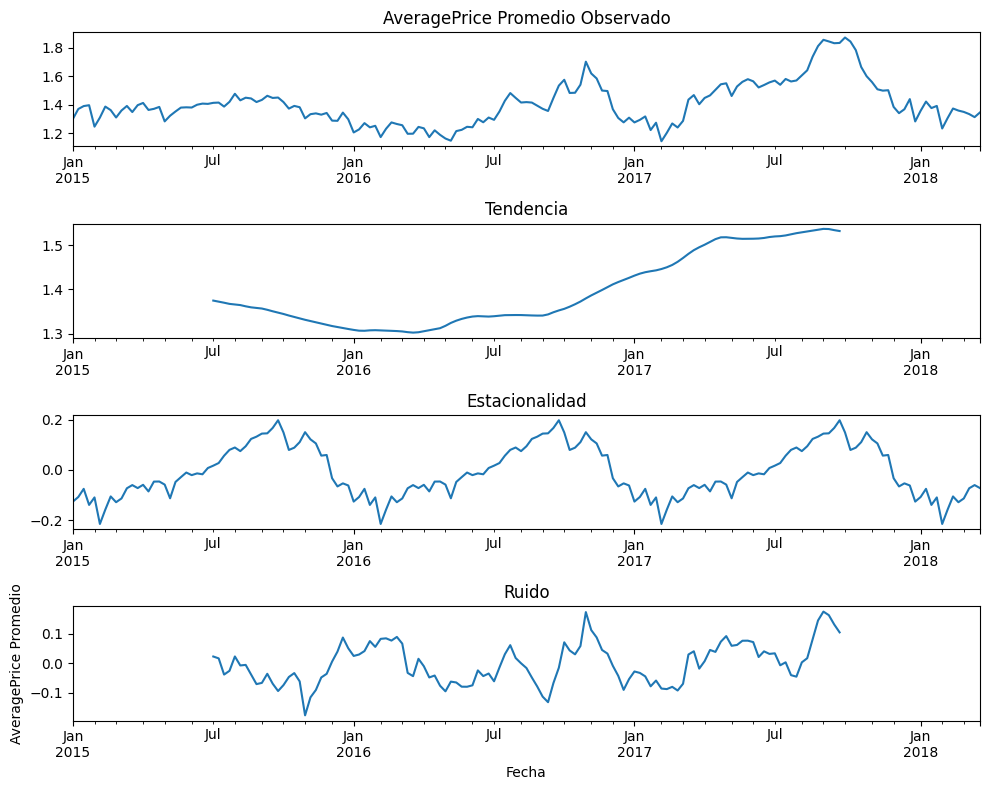

In [7]:
P.P1.P1_1_DescomposicionSerieTemporal(52,'AveragePrice')
#P.P1.P1_1_DescomposicionSerieTemporal(52,'Total Volume')

#P.P1.P1_1_DescomposicionSerieTemporal(4,'AveragePrice')
#P.P1.P1_1_DescomposicionSerieTemporal(4,'Total Volume')


1.2 | **Análisis de Estacionalidad por Región:** 
   
**Análisis de Estacionalidad por Región:** 
   - **Uso de Datos:** Usa las columnas `AveragePrice`, `Date` y `Total Volume`.
   - **Esperado:** Utiliza gráficos de líneas para visualizar cómo varían los precios de aguacates por región a lo largo de diferentes estaciones del año.
     - Agrupa los datos por `region` y `Date` utilizando `groupby()`.
     - Calcula el promedio de `AveragePrice` para cada región.
     - Representa gráficamente las tendencias utilizando `plt.plot()` de `matplotlib`.


1.2 NOTAS: | <span style='font-size:16px; color:blue; font-style:italic;'>- **Cada línea representa una región específica y permite observar las tendencias estacionales en los precios. 
 - **Por ejemplo, se pueden identificar picos o caídas en precios en ciertas épocas, lo que refleja la oferta y demanda.</span>

<Figure size 2000x600 with 0 Axes>

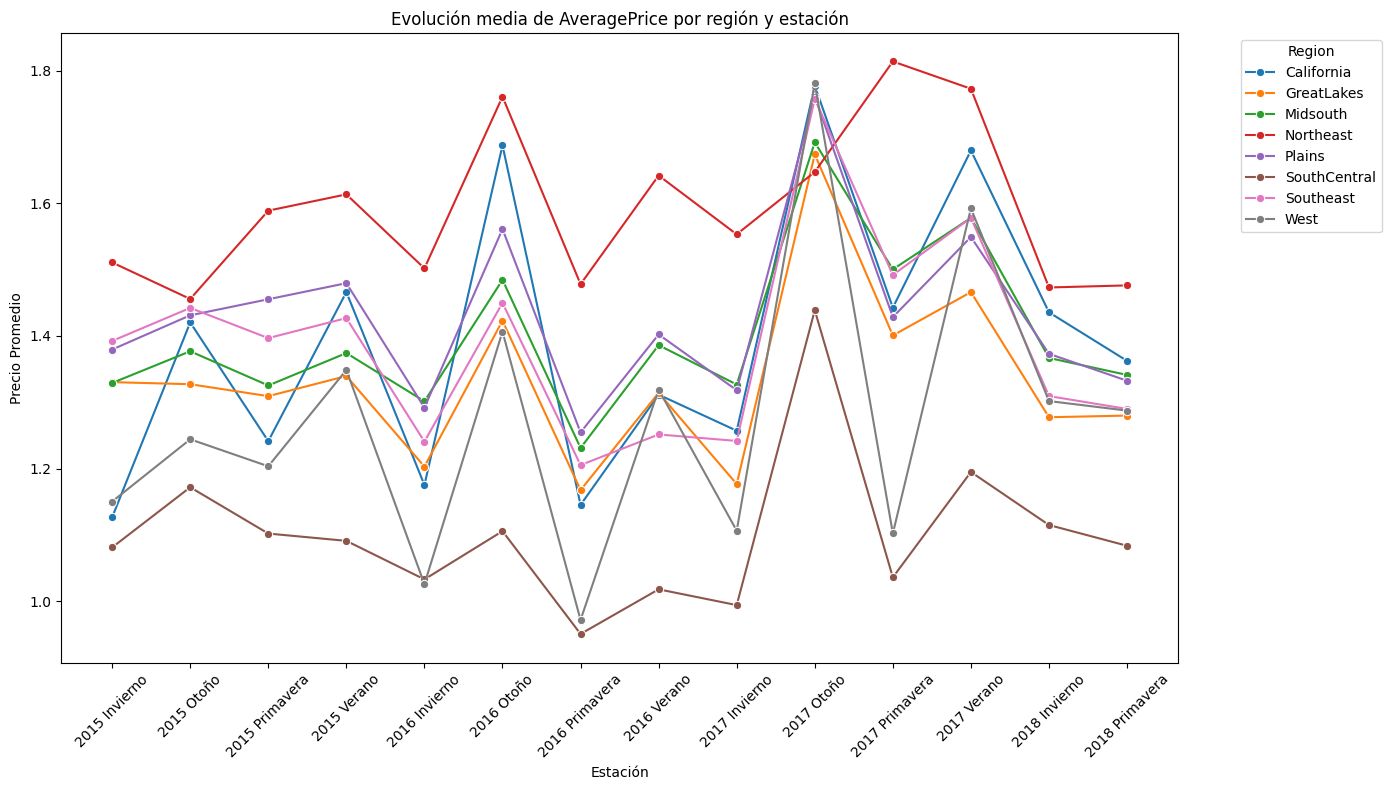

In [8]:
P.P1.Datos = P.DatosORG[(P.DatosORG['CalRegionGrupo'].isin(['GreaterRegion'])) ]
#P.P1.Datos = P.DatosORG[(P.DatosORG['region'].isin(['California'])) ]
P.P1.P1_2_EstacionalidadPorRegion()
P.P1.Datos = P.DatosORG


1.3 | **Comparación de Precios Promedio Mensuales:** 
   
**Uso de Datos:** Usa las columnas `AveragePrice` y `Date`.
   - **Esperado:** Calcula y compara los precios promedio mensuales.
     - Agrupa los datos por mes usando `pd.Grouper` con `freq='M'`.
     - Calcula el promedio de `AveragePrice` para cada mes con `mean()`.
     - Visualiza los resultados con un gráfico de líneas usando `plt.plot()`.


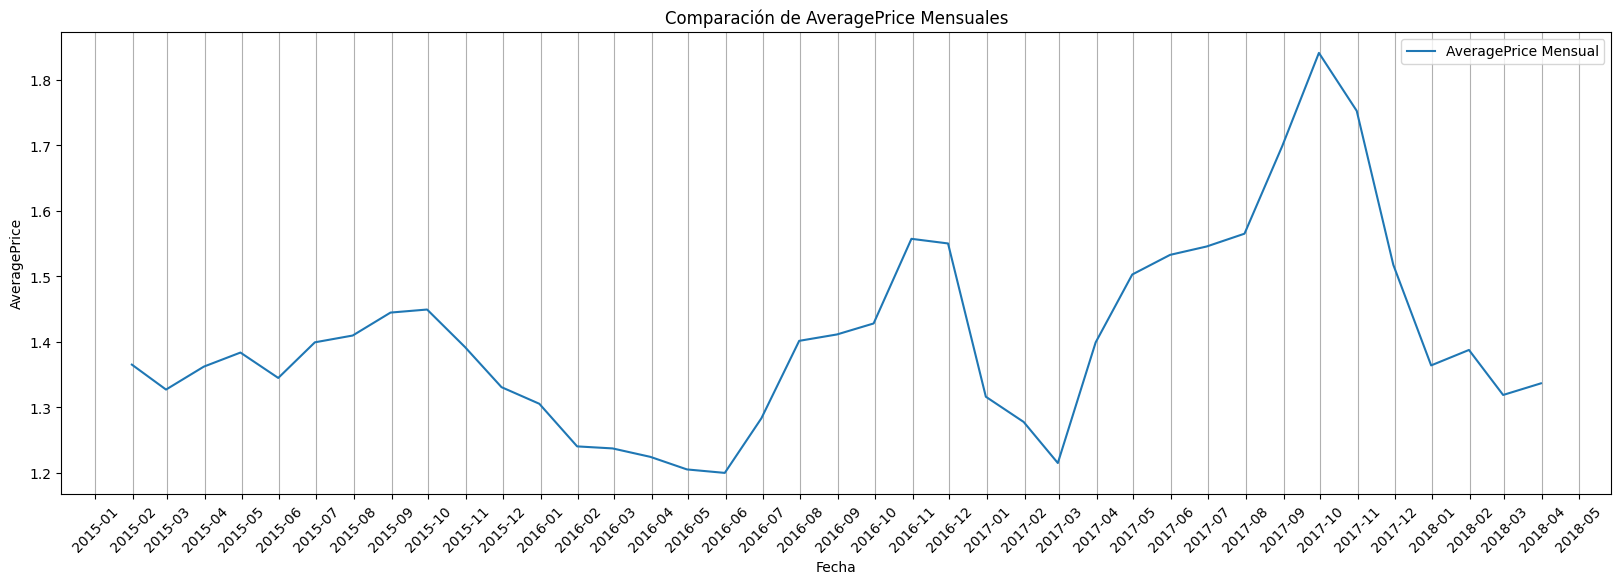

In [9]:
#P.P1.P1_3_ADD_Correlacion(3500000)
P.P1.P1_3_ComparacionPreciosPromedioMensuales()

1.4 | **Tendencia de Ventas a lo Largo del Tiempo:** 
   
- **Uso de Datos:** Usa las columnas `Total Volume` y `Date`.
   - **Esperado:** Analiza cómo varía el volumen total de ventas a lo largo del tiempo.
     - Agrupa los datos por `Date` y suma el `Total Volume` usando `groupby()`.
     - Visualiza los resultados usando un gráfico de líneas con `plt.plot()` para mostrar la tendencia.


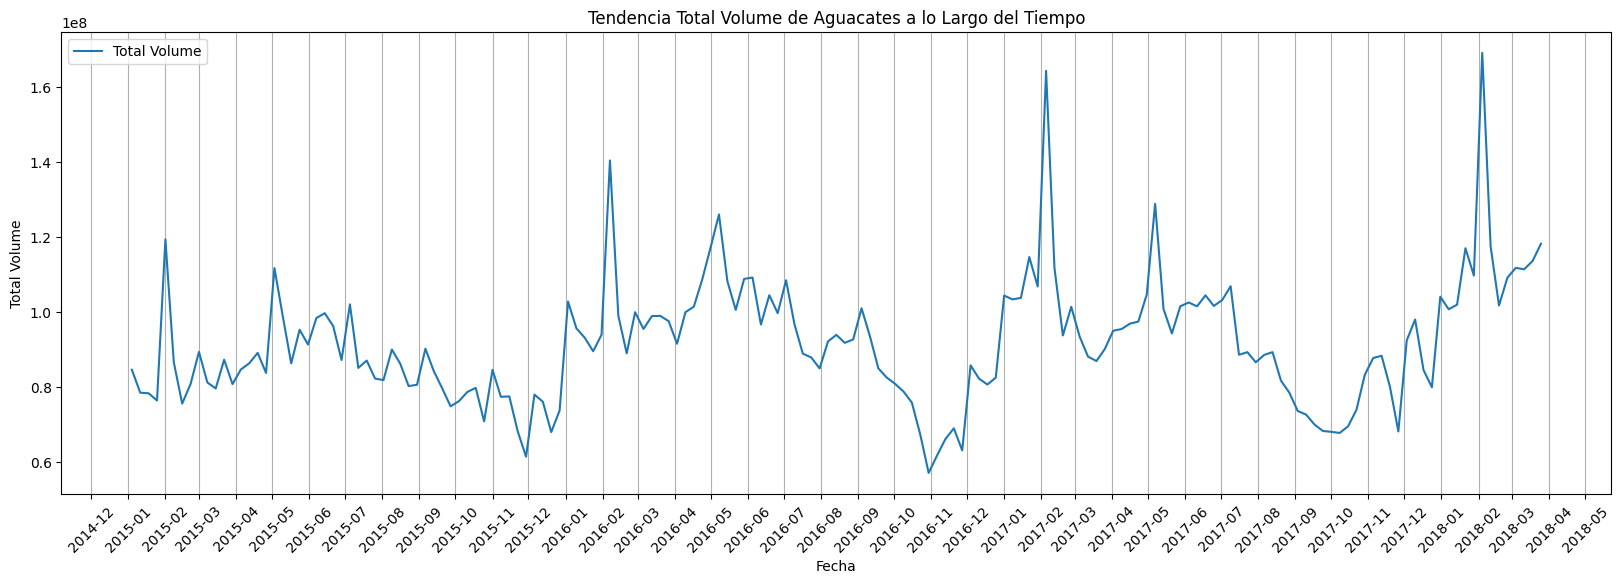

In [10]:
P.P1.Datos = P.DatosORG
#P.P1.Datos = P.DatosORG[(P.DatosORG['region'].isin(['California'])) ]
P.P1.P1_4_TendenciaVentasALoLargoDelTiempo()

1.5 | **Análisis de Cambios en Precios Anuales:** 
   
**Análisis de Cambios en Precios Anuales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `year`.
   - **Esperado:** Observa las diferencias anuales en los precios promedio.
     - Agrupa los datos por `year` utilizando `groupby()`.
     - Calcula el promedio de `AveragePrice` para cada año.
     - Representa los resultados en un gráfico de barras usando `plt.bar()` que compare los precios de cada año.


- **parametros**:  
         - *pAnos:*	`[[2015, 2016, 2017, 2018]]`
         - *pClasificacion:*	`['']` City,Region,GreaterRegion,TotalUS
    

<Figure size 2000x600 with 0 Axes>

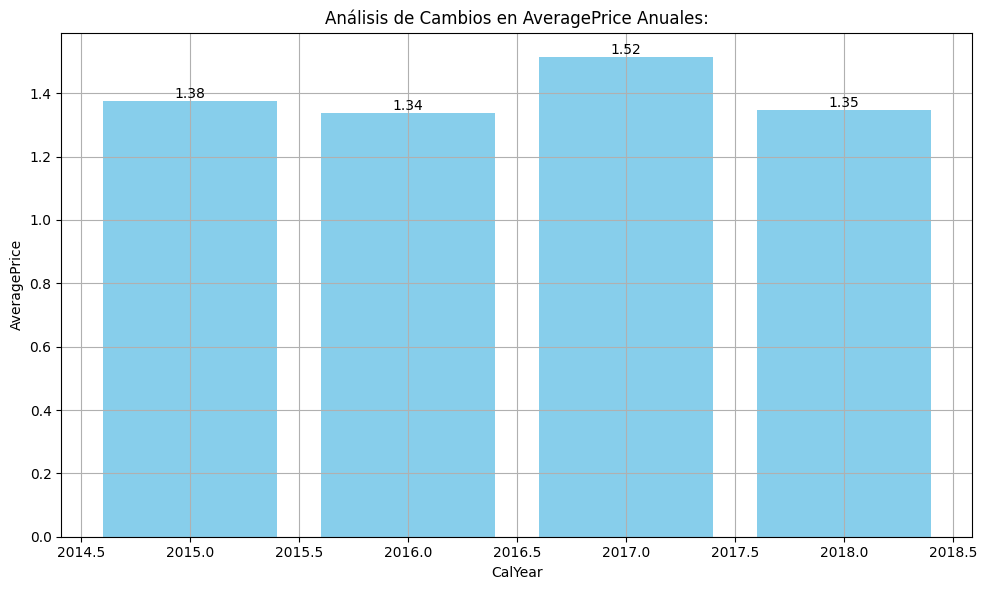

1.5 | **Análisis de Cambios en Precios Anuales:** 
   
**Análisis de Cambios en Precios Anuales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `year`.
   - **Esperado:** Observa las diferencias anuales en los precios promedio.
     - Agrupa los datos por `year` utilizando `groupby()`.
     - Calcula el promedio de `AveragePrice` para cada año.
     - Representa los resultados en un gráfico de barras usando `plt.bar()` que compare los precios de cada año.


- **parametros**:  
         - *pAnos:*	`[[2015, 2016, 2017, 2018]]`
         - *pClasificacion:*	`['']` City,Region,GreaterRegion,TotalUS
    

<Figure size 2000x600 with 0 Axes>

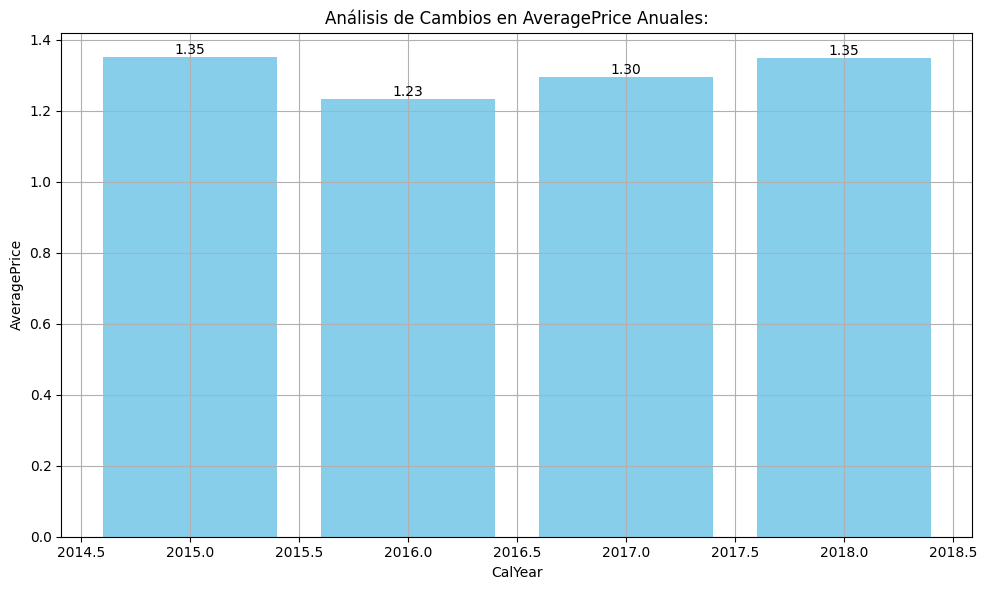

In [11]:
P.P1.Datos = P.DatosORG
#P.P1.P1_5_AnalisisCambiosPreciosAnuales()
P.P1.P1_5_AnalisisCambiosPreciosAnuales([2015, 2016, 2017,2018])
P.P1.Datos = P.DatosORG[(P.DatosORG['CalMonth'].isin([1,2,3])) ]
P.P1.P1_5_AnalisisCambiosPreciosAnuales([2015, 2016, 2017,2018])

2.1 | **Gráfico de Violín de Volumen de Ventas por Región:** 
   
- **Uso de Datos:** Usa las columnas `Total Volume` y `region`.
   - **Esperado:** Visualiza la distribución de ventas en diferentes regiones.
     - Utiliza la función `violinplot` de `seaborn` para crear gráficos de violín.
     - Configura los ejes para mostrar la relación entre `Total Volume` y `region`.
     - Añade etiquetas y títulos usando `plt.title()` y `plt.xlabel()` para facilitar la interpretación.


2.1 NOTAS: | <span style='font-size:16px; color:blue; font-style:italic;'>- Cada violín indica **la densidad de la distribución** del volumen de ventas de cada región.
 - La forma y el ancho del violín a lo largo del eje Y representan cuántas observaciones están dentro de ese rango de Total Volume para la región dada. Un violín más ancho en un área específica significa más datos en ese rango de ventas. 
 - En cada violín puedes ver una línea central que marca la mediana, y a veces otras líneas para los cuartiles, dependiendo de la configuración predeterminada.</span>

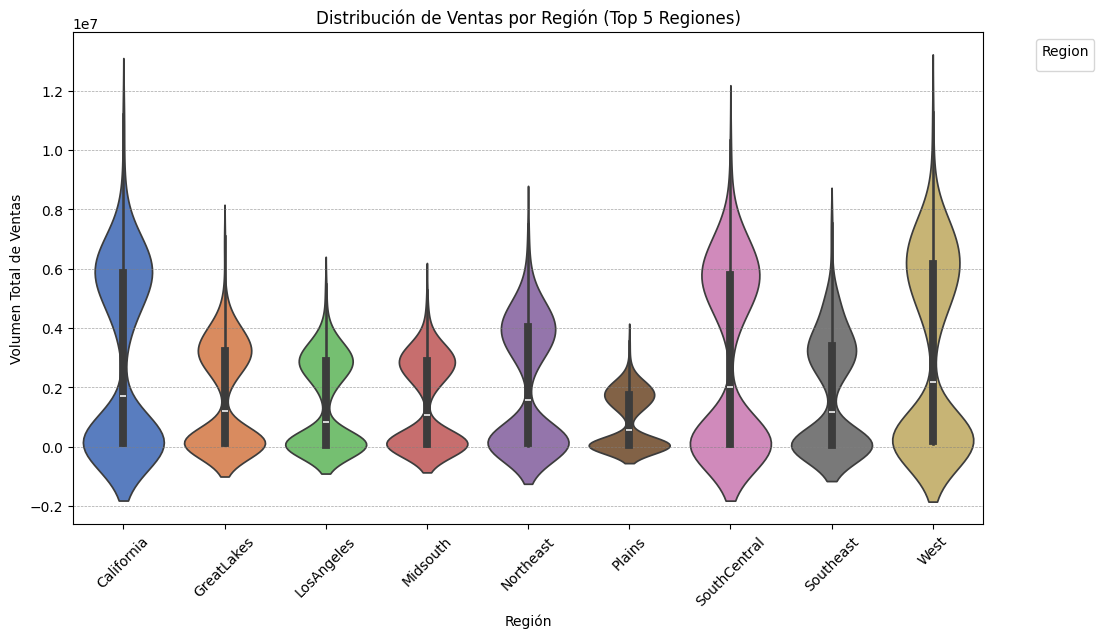

In [12]:
P.PG.P21_Grafico_Violin_Volumen_Venta_Region()

2.2 | **Boxplot Comparativo de Precios entre Años:** 
   
- **Uso de Datos:** Usa las columnas `AveragePrice` y `year`.
   - **Esperado:** Genera boxplots para comparar la distribución de precios.
     - Utiliza `boxplot` de `seaborn` para crear boxplots que comparen `AveragePrice` entre diferentes años.
     - Asegúrate de que cada boxplot represente un año diferente.
     - Incluye etiquetas y títulos descriptivos usando `plt.title()`.


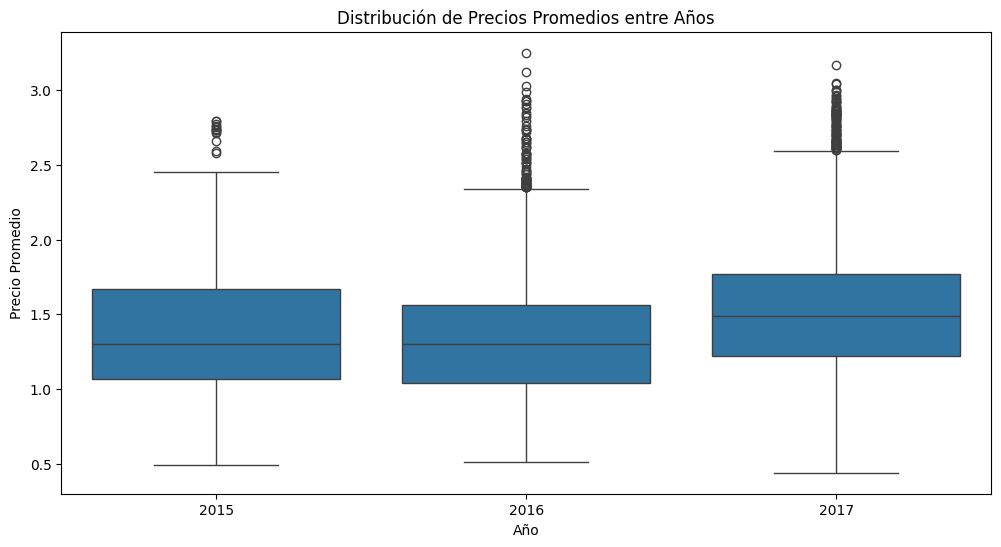

In [13]:
P.P2.Datos = P.DatosORG[(P.DatosORG['CalYear'].isin([2015,2016,2017])) ]
P.P2.P22_Boxplot_Comparativo_Precios_Entre_Años()

2.3 | **Histograma de Volumen Total de Ventas:** 
   
 - **Uso de Datos:** Usa la columna `Total Volume`.
   - **Esperado:** Crea un histograma para mostrar la distribución del volumen total de ventas.
     - Utiliza `hist()` de `matplotlib` para crear el histograma.
     - Ajusta el número de bins para una visualización clara usando el parámetro `bins`.
     - Añade etiquetas y un título que describa lo que se muestra.


- **parametros**:  
         - *pbins:*`30` Numero de intervalos
         - *pLog:*`True` Escala logaritmica True/False
    

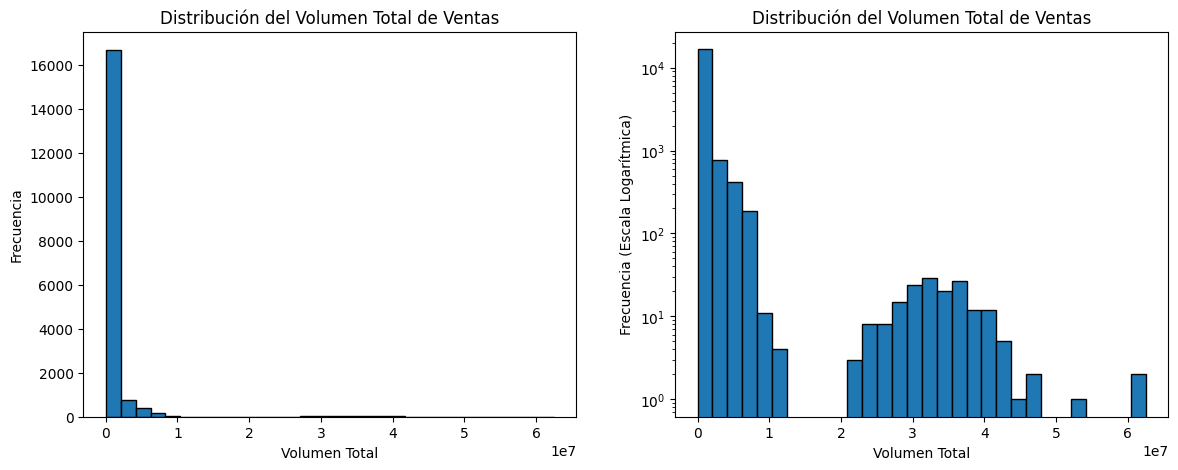

<Figure size 640x480 with 0 Axes>

2.3 | **Histograma de Volumen Total de Ventas:** 
   
 - **Uso de Datos:** Usa la columna `Total Volume`.
   - **Esperado:** Crea un histograma para mostrar la distribución del volumen total de ventas.
     - Utiliza `hist()` de `matplotlib` para crear el histograma.
     - Ajusta el número de bins para una visualización clara usando el parámetro `bins`.
     - Añade etiquetas y un título que describa lo que se muestra.


- **parametros**:  
         - *pbins:*`30` Numero de intervalos
         - *pLog:*`True` Escala logaritmica True/False
    

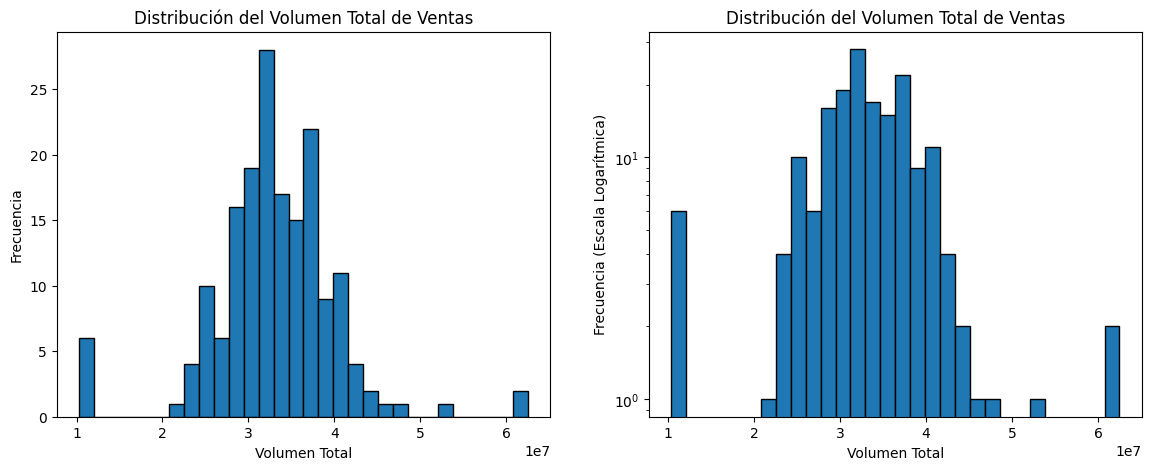

<Figure size 640x480 with 0 Axes>

In [14]:
from IPython.display import display, HTML
P.P2.Datos = P.DatosORG
P.P2.P23_Histograma_Volumen_Total_Ventas(30,True)
display(HTML("<span style='font-size:20px; color:blue; font-style:italic;'>Filtrado Total Volume > 10.000.000 </span>"))
P.P2.Datos = P.DatosORG[(P.DatosORG['Total Volume'] > 10000000) ]
P.P2.P23_Histograma_Volumen_Total_Ventas(30,True)

2.4 | **Gráfico de Barras de Ventas por Tipo de Bolsa:** 
   
- **Uso de Datos:** Utiliza las columnas `Total Bags`, `Small Bags`, `Large Bags` y `XLarge Bags`.
   - **Esperado:** Compara las ventas de diferentes tipos de bolsas.
     - Suma los volúmenes de ventas por tipo de bolsa utilizando `sum()`.
     - Crea un gráfico de barras con `plt.bar()` para mostrar las diferencias en ventas.
     - Asegúrate de incluir etiquetas para cada tipo de bolsa.


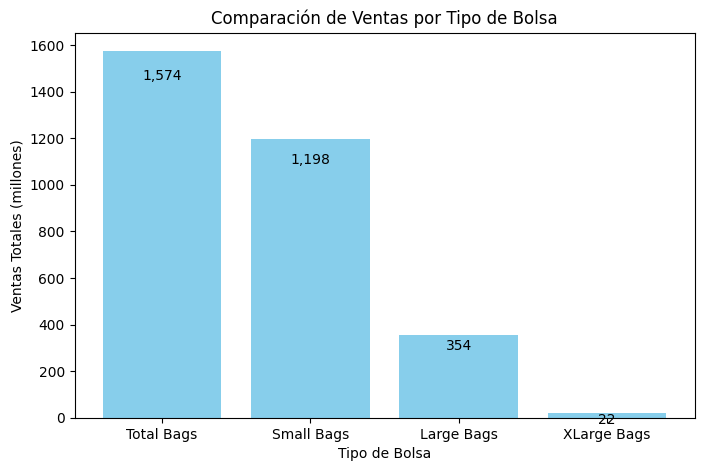

In [15]:
P.P2.P24_Grafico_Barras_Ventas_Tipo_Bolsa()

2.5 | **Gráfico de Líneas de Precios Promedios por Año:** 
   
- **Uso de Datos:** Utiliza las columnas `AveragePrice` y `year`.
   - **Esperado:** Visualiza la tendencia de precios promedio a lo largo de los años.
     - Agrupa los datos por `year` y calcula el promedio de `AveragePrice`.
     - Usa `plt.plot()` para crear un gráfico de líneas que muestre la evolución de precios.
     - Añade un título y etiquetas descriptivas a los ejes usando `plt.title()` y `plt.xlabel()`.


- **parametros**:  
         - *pAnos:*	`[[2015, 2016, 2017]]`
    

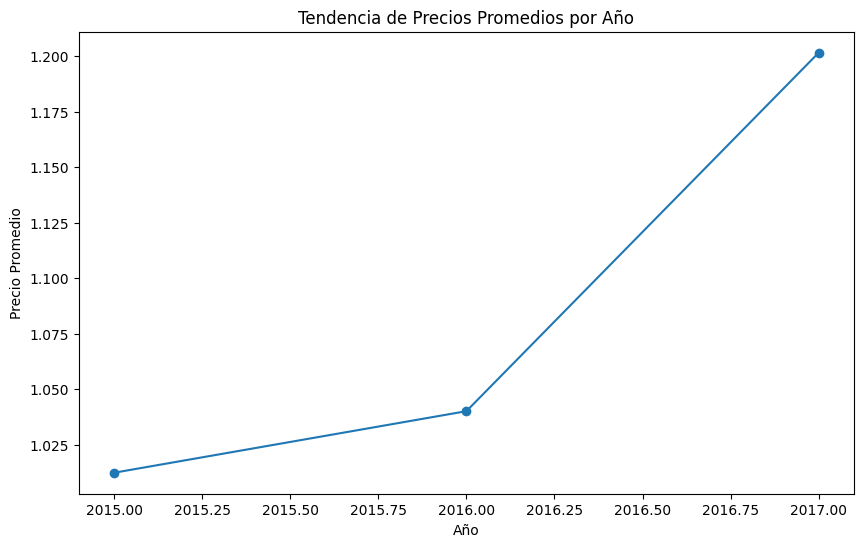

In [16]:
P.P2.P25_Grafico_Lineas_Precios_Promedios_Año([2015, 2016, 2017])

Fintrado años [2015, 2016,2017]


3.1 | **Elasticidad Precio-Demanda por Año:** 
   
- **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Volume`.
   - **Esperado:** Calcula la elasticidad del precio de la demanda para cada año.
     - Calcula la variación porcentual de `Total Volume` y `AveragePrice` utilizando `pd.pct_change()`.
     - Utiliza la fórmula de elasticidad para determinar la sensibilidad de la demanda respecto al precio.
     - Presenta los resultados en un gráfico de líneas usando `plt.plot()` para mostrar la elasticidad por año.



- **parametros**:  
     - **pListaRegiones:** `['TotalUS']`

    

Tabla Elasticidad periodo
   Cambio_Volumen  Cambio_Precio  Elasticidad
0             NaN            NaN          NaN
1        0.097694       0.004894    19.961636
2        0.005690       0.136951     0.041550
3        0.240262      -0.090157    -2.664921


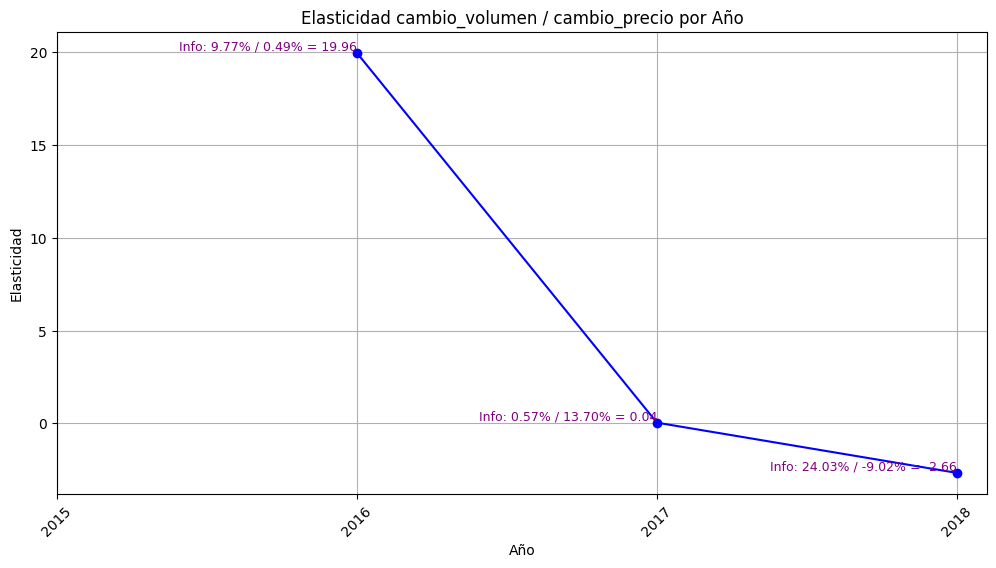

In [17]:
P.P3.Datos = P.DatosORG
#P.P3.Datos = P.DatosORG[P.DatosORG['CalYear'].isin([ 2015,2016,2017])] 
#P.P3.Datos = P.DatosORG[(P.DatosORG['region'].isin(['TotalUS'])) ]
print('Fintrado años [2015, 2016,2017]')
P.P3.P3_1_Elasticidad_Precio_Demanda_Año(['TotalUS'])
# Los valores positivos indican una alta elasticidad la demanda sube cuando sube el precio cada 1% que aumenta el precio la venta sube un 6%
# mientras que en el 2016 indica todo lo contrario la demanda sube cuando baja el precio, cada 1% que aumenta el precio la venta baja un 4%

3.2 | **Comparación de Elasticidad en Diferentes Mercados:** 
   
- **Uso de Datos:** Utiliza las columnas `Total Volume` y `AveragePrice`.
   - **Esperado:** Calcula la elasticidad del precio de la demanda en diferentes regiones.
     - Agrupa los datos por `region` y calcula la elasticidad para cada región utilizando `pd.pct_change()`.
     - Presenta un gráfico de barras que muestre la elasticidad por región usando `plt.bar()`.


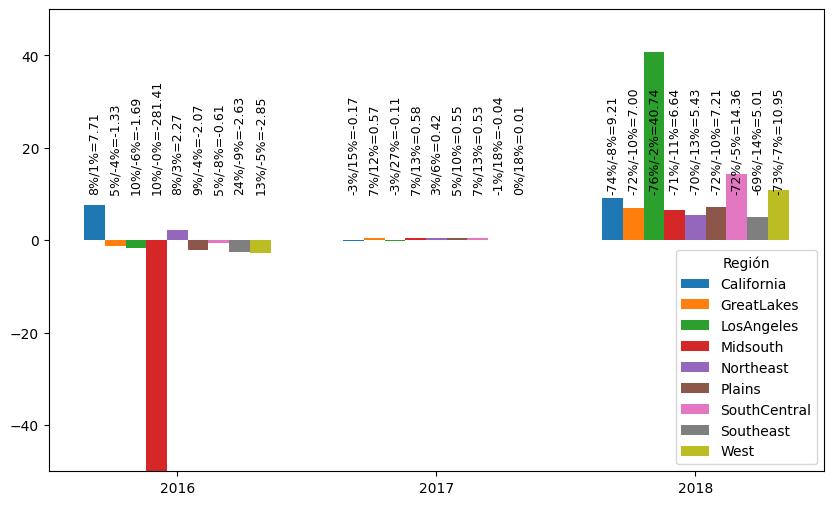

In [18]:
P.PG.P3_2_Elasticidad_Regiones()


3.3 | **Elasticidad a Nivel de Tipo de Bolsa:** 
   
- **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Bags`.
   - **Esperado:** Calcula la elasticidad del precio de la demanda específica para cada tipo de bolsa.
     - Suma los volúmenes de ventas por tipo de bolsa utilizando `groupby()` y `sum()`.
     - Calcula la elasticidad para cada tipo y presenta los resultados en un gráfico comparativo usando `plt.bar()`.


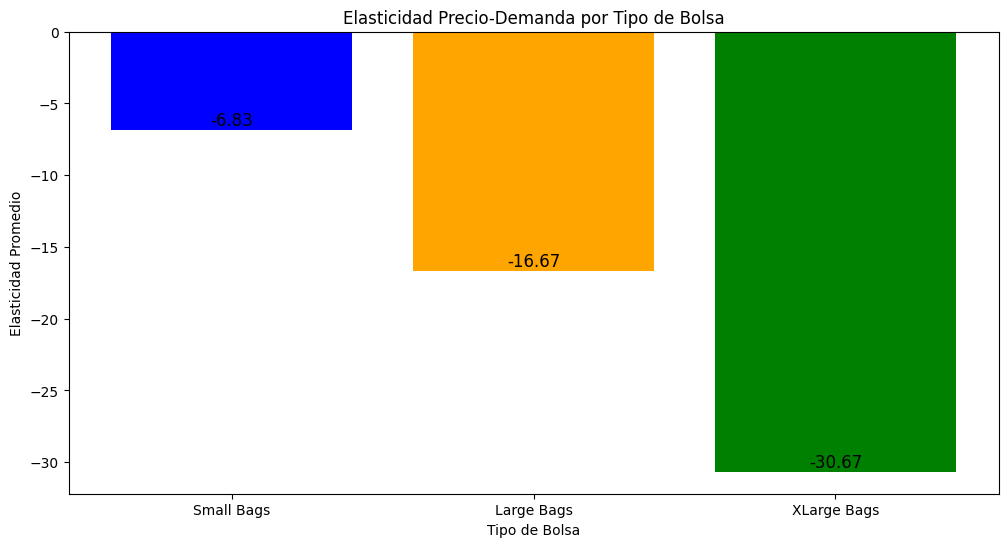

In [19]:
P.P3.Datos = P.DatosORG
#print(len(P.DatosORG))
#P.P3.Datos = P.DatosORG[(P.DatosORG['CalYear'].isin([2016,2017])) ]

P.P3.P3_3_Elasticidad_BolsasB()

vMsg="""
<b>NOTAS:</b>
- <span style="color:blue;">Se eliminan los años 2015 y 2018, al no estar completos darían cifras incorrectas.</span>
- <span style="color:blue;">Esto da como resultado 2 registros: 2016 y 2017. Eliminamos el registro 2016 ya que es 0, y la media sería errónea.</span>
- <span style="color:blue;">Calculando Elasticidad media de los 3 años, para Cada Tipo de Bolsa...</span>

<table>
<tr><th>CalYear</th><th>AveragePrice</th><th>Small Bags</th><th>Large Bags</th><th>XLarge Bags</th></tr>
<tr><td>2016</td><td>1.338640</td><td>1.106494e+09</td><td>3.366263e+08</td><td>20038284.84</td></tr>
<tr><td>2017</td><td>1.515128</td><td>1.222953e+09</td><td>3.993390e+08</td><td>23997172.34</td></tr>
<tr><td>0</td><td>0.000000</td><td></td><td></td><td></td></tr>
<tr><td>1</td><td>0.798307</td><td></td><td></td><td></td></tr>
</table>

<b># Calcular la elasticidad promedio</b>
<pre>
elasticidades_promedio = [
    Datos_bolsas['Elasticidad_Small'].mean(),
    Datos_bolsas['Elasticidad_Large'].mean(),
    Datos_bolsas['Elasticidad_XLarge'].mean()
]
</pre>

- <span style="color:blue;">El gráfico muestra la media del resto de los años; en este caso, solo un registro.</span>
"""
from IPython.display import display, HTML
P.P2.Datos = P.DatosORG
display(HTML(vMsg))


In [20]:
P.P3.Datos = P.DatosORG
#print(len(P.DatosORG))
P.P3.Datos = P.DatosORG[(P.DatosORG['CalYear'].isin([2015,2016,2017,2018])) ]
P.P3.P3_4_Elasticidad_Tipo()

3.4 | **Análisis de Elasticidad Comparativa entre Orgánicos y Convencionales:** 
   
- **Uso de Datos:** Usa las columnas `AveragePrice`, `Total Volume` y `type`.
   - **Esperado:** Compara la elasticidad de la demanda entre aguacates orgánicos y convencionales.
     - Agrupa los datos por `type` y calcula la elasticidad utilizando `pd.pct_change()`.
     - Presenta un gráfico que muestre la diferencia en elasticidad entre los dos tipos usando `plt.bar()`.


3.4 NOTAS: | <span style='font-size:16px; color:blue; font-style:italic;'></span>

3.5 | **Análisis de la Elasticidad Precios-Ventas:** 
   
- **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Volume`.
   - **Esperado:** Examina cómo las variaciones en `AveragePrice` afectan a `Total Volume`.
     - Realiza un análisis de la relación entre estas dos variables calculando la elasticidad.
     - Presenta un gráfico de dispersión que muestre la relación y discute la tendencia observada utilizando `plt.scatter()` y `plt.plot()`.


Analizando Elasticidad entre Precios y Ventas Totales...


/home/jbentezag/.local/lib/python3.8/site-packages/matplotlib/collections.py:963: RuntimeWarning:

invalid value encountered in sqrt



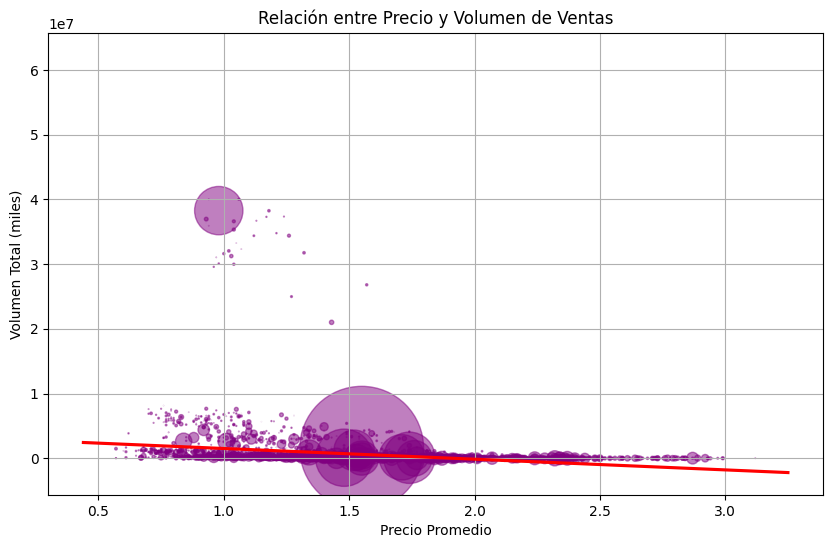

3.5 | **Análisis de la Elasticidad Precios-Ventas:** 
   
- **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Volume`.
   - **Esperado:** Examina cómo las variaciones en `AveragePrice` afectan a `Total Volume`.
     - Realiza un análisis de la relación entre estas dos variables calculando la elasticidad.
     - Presenta un gráfico de dispersión que muestre la relación y discute la tendencia observada utilizando `plt.scatter()` y `plt.plot()`.


Analizando Elasticidad entre Precios y Ventas Totales...


/home/jbentezag/.local/lib/python3.8/site-packages/matplotlib/collections.py:963: RuntimeWarning:

invalid value encountered in sqrt



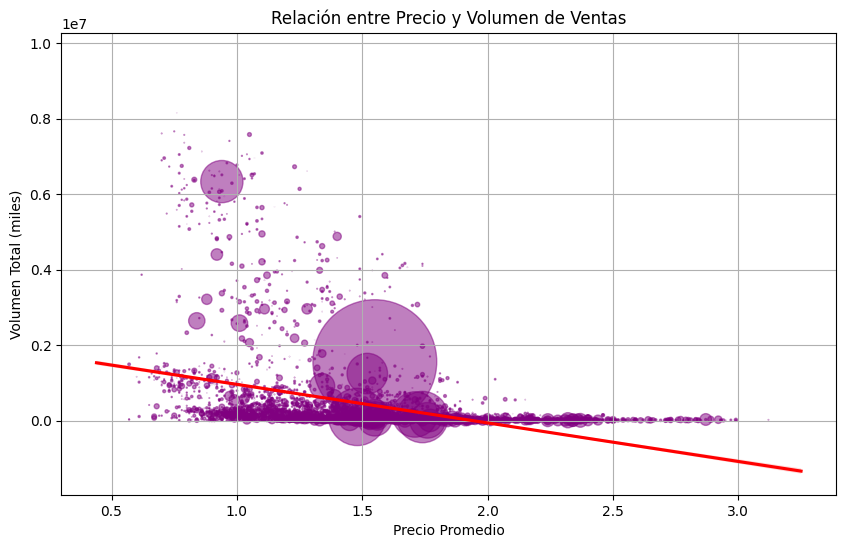

In [21]:
P.P3.Datos= P.DatosORG
P.P3.P3_5_Elasticidad_Precio_Ventas()
P.P3.Datos = P.DatosORG[(P.DatosORG['Total Volume'] < 10000000) ]
P.P3.P3_5_Elasticidad_Precio_Ventas()

4.1 | **Cohortes Basadas en Precios Promedios Trimestrales:** 
   
- **Uso de Datos:** Usa las columnas `AveragePrice`, `Total Volume` y `Date`.
   - **Esperado:** Crea cohortes trimestrales y analiza cambios en precios y volúmenes.
     - Agrupa los datos por trimestre usando `pd.Grouper` con `freq='Q'`.
     - Calcula el promedio de `AveragePrice` y suma `Total Volume` para cada cohorte.
     - Visualiza los resultados en un gráfico de líneas que muestre la evolución de las cohortes.


4.1 NOTAS: | <span style='font-size:16px; color:blue; font-style:italic;'></span>

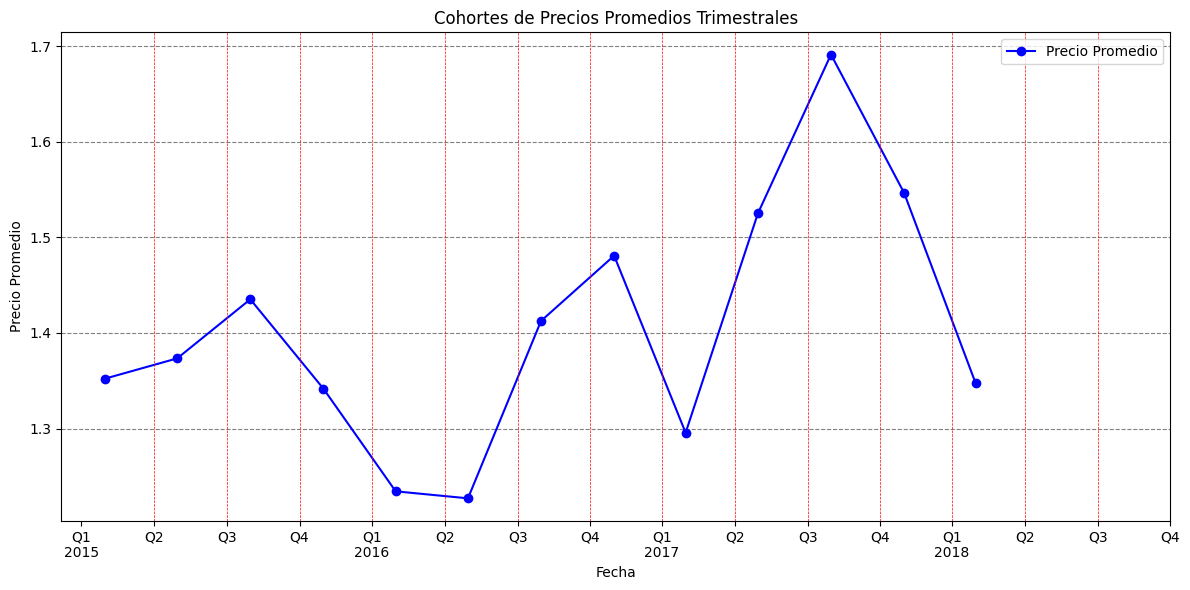

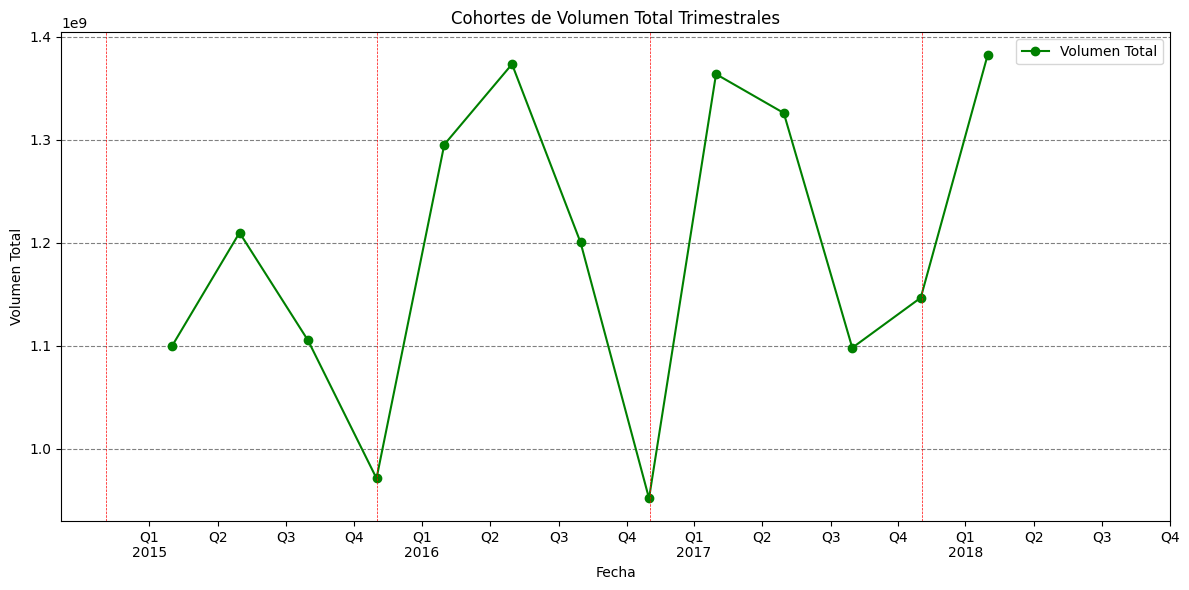

In [22]:
from IPython.display import display, HTML
display(HTML("<span style='font-size:20px; color:red; font-style:italic;'>ERRONEO no se han definido Cohortes</span>"))
P.P4.P4_1_CohortesPreciosPromedios()


4.2 | **Cohortes por Región y Fecha:** 
   
 - **Uso de Datos:** Utiliza las columnas `AveragePrice`, `Total Volume`, `region` y `Date`.
   - **Esperado:** Analiza cómo varían las cohortes de diferentes regiones.
     - Agrupa los datos por `region` y `Date` usando `groupby()`.
     - Calcula el promedio de precios y volumen para cada cohorte.
     - Presenta los resultados en gráficos de barras que muestren comparaciones entre regiones.


4.2 NOTAS: | <span style='font-size:16px; color:blue; font-style:italic;'>** Interpretación del Gráfico** 
 - El gráfico muestra la evolución de AveragePrice y Total Volume para cada región a lo largo del tiempo. 
** Las barras representan el volumen total y las líneas indican el precio promedio en cada trimestre, lo que ayuda a comparar 
** cómo las diferentes regiones responden a cambios en el mercado.</span>

Datos agrupados por región y fecha, calculando precios promedios y volúmenes totales.


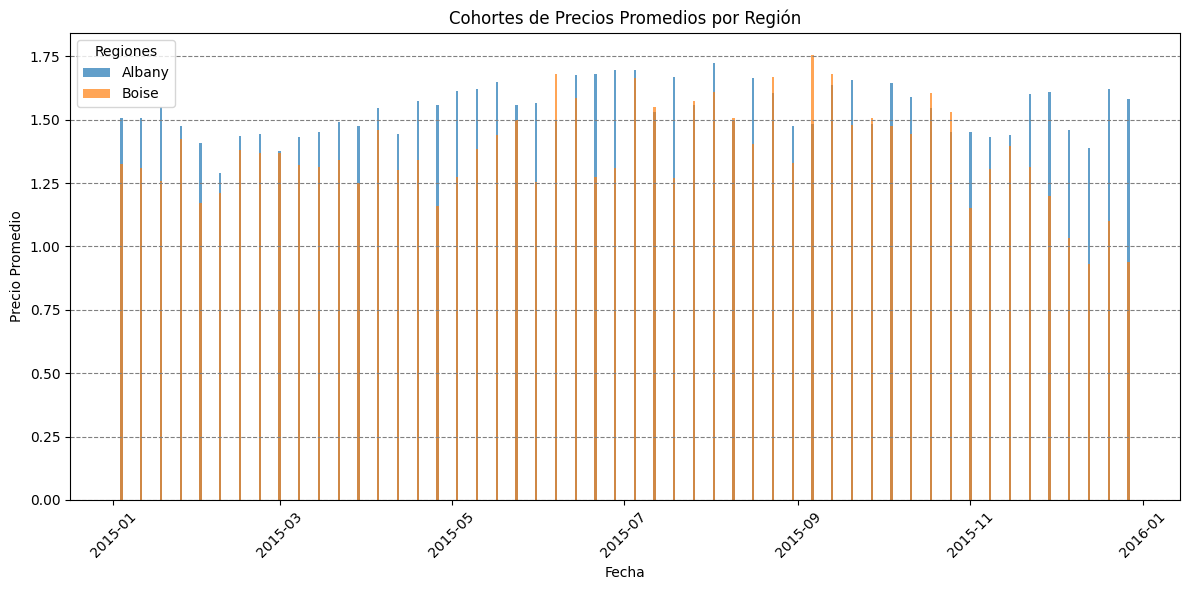

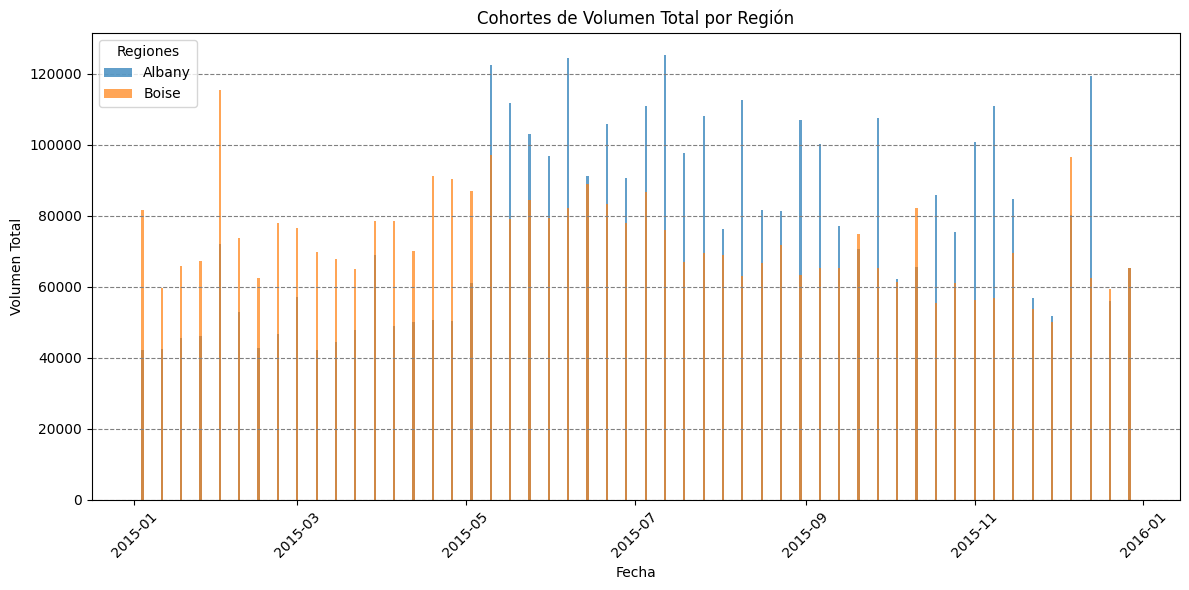

In [23]:
from IPython.display import display, HTML
display(HTML("<span style='font-size:20px; color:red; font-style:italic;'>ERRONEO no se han definido Cohortes</span>"))

P.P4.P4_2_CohortesRegionFechaB(['Albany','Boise'],2015)

4.3 | **Análisis de Cohortes en Función del Tipo de Bolsa:** 
   
- **Uso de Datos:** Usa las columnas `Total Bags`, `Small Bags`, `Large Bags`, `XLarge Bags` y `Date`.
   - **Esperado:** Examina cómo se comportan las diferentes cohortes según el tipo de bolsa.
     - Agrupa los datos por tipo de bolsa y `Date`.
     - Calcula el volumen de ventas total y muestra los resultados en un gráfico de líneas.


- **parametros**:  
         - **pTipoBolsa:**`[['Small Bags', 'Large Bags', 'XLarge Bags']]` 
         - **pTipoEscala:**`['']`  **Posibles valores** '' Normal 'log'  Logaritmica
         - **pTipoBolsa:**`['NO']`   **Posibles valores** SI, NO                
    

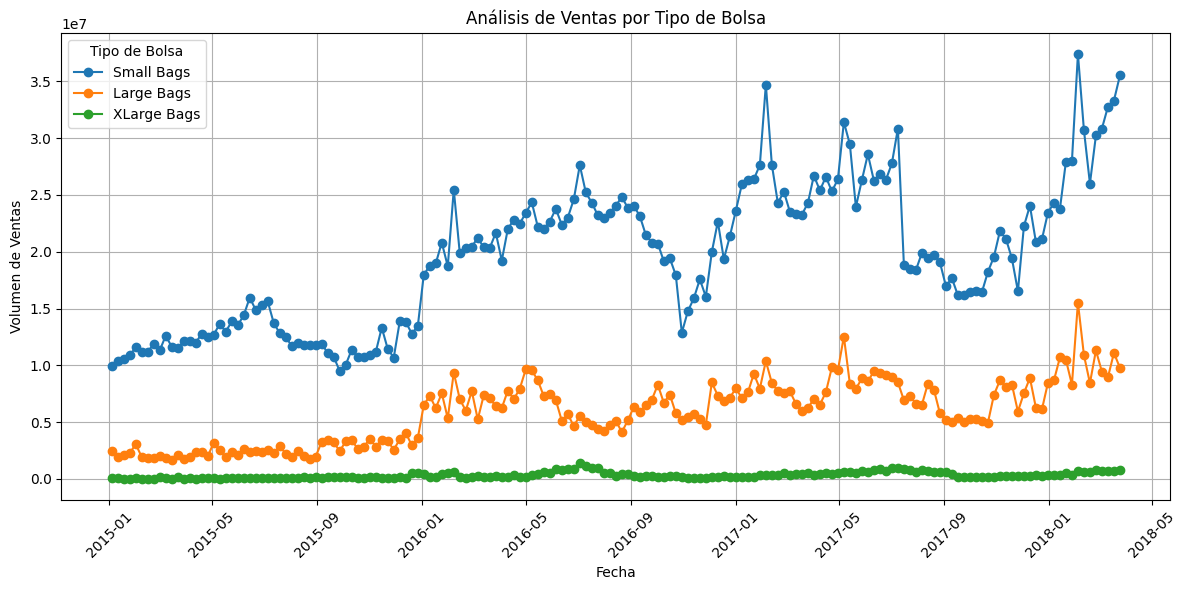

4.3 | **Análisis de Cohortes en Función del Tipo de Bolsa:** 
   
- **Uso de Datos:** Usa las columnas `Total Bags`, `Small Bags`, `Large Bags`, `XLarge Bags` y `Date`.
   - **Esperado:** Examina cómo se comportan las diferentes cohortes según el tipo de bolsa.
     - Agrupa los datos por tipo de bolsa y `Date`.
     - Calcula el volumen de ventas total y muestra los resultados en un gráfico de líneas.


- **parametros**:  
         - **pTipoBolsa:**`[['Small Bags', 'Large Bags', 'XLarge Bags']]` 
         - **pTipoEscala:**`['']`  **Posibles valores** '' Normal 'log'  Logaritmica
         - **pTipoBolsa:**`['SI']`   **Posibles valores** SI, NO                
    

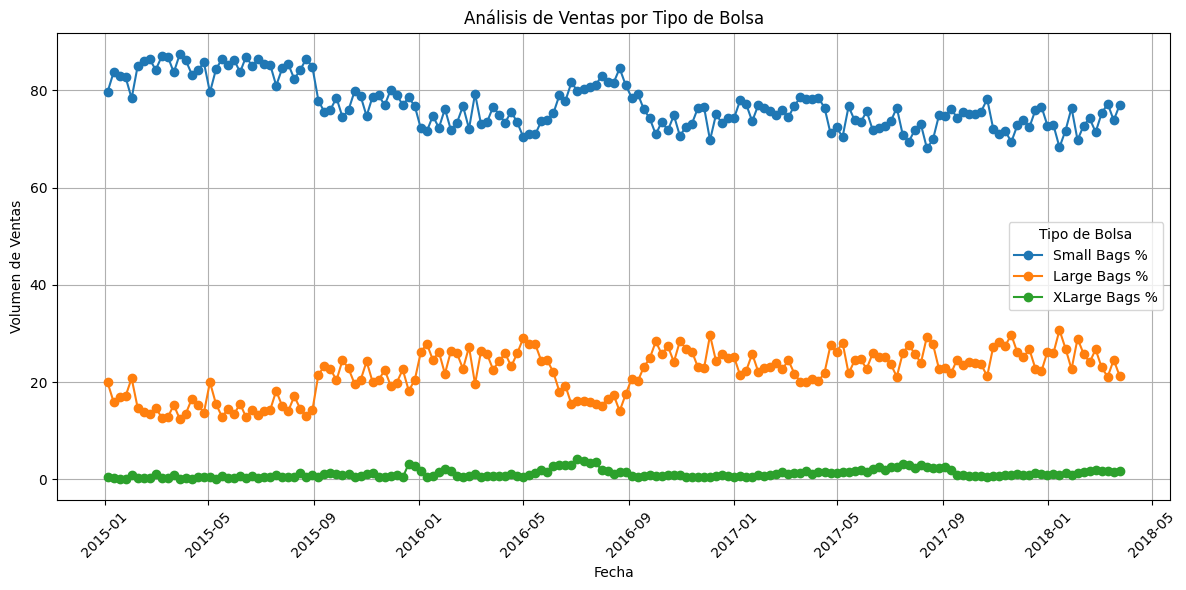

In [24]:
from IPython.display import display, HTML
display(HTML("<span style='font-size:20px; color:red; font-style:italic;'>ERRONEO el tipo de Bolsa no es el Cohorte a analizar, sino la región</span>"))

P.P4.P4_3_CohortesTipoBolsa(['Small Bags','Large Bags','XLarge Bags'],'','NO')
#P.P4.P4_3_CohortesTipoBolsa(['Small Bags','Large Bags','XLarge Bags'],'log','NO')
P.P4.P4_3_CohortesTipoBolsa(['Small Bags','Large Bags','XLarge Bags'],'','SI')
#P.P4.P4_3_CohortesTipoBolsa(['Small Bags','Large Bags','XLarge Bags'],'log','SI')
#P.P4.P4_3_CohortesTipoBolsa(['XLarge Bags'],'','SI')

4.3 | **Análisis de Cohortes en Función del Tipo de Bolsa:** 
   
- **Uso de Datos:** Usa las columnas `Total Bags`, `Small Bags`, `Large Bags`, `XLarge Bags` y `Date`.
   - **Esperado:** Examina cómo se comportan las diferentes cohortes según el tipo de bolsa.
     - Agrupa los datos por tipo de bolsa y `Date`.
     - Calcula el volumen de ventas total y muestra los resultados en un gráfico de líneas.


- **parametros**:  
         - **pTipoBolsa:**`[['Small Bags', 'Large Bags', 'XLarge Bags']]` 
         - **pTipoBolsa:**`['SI']`   **Posibles valores** SI, NO                
    

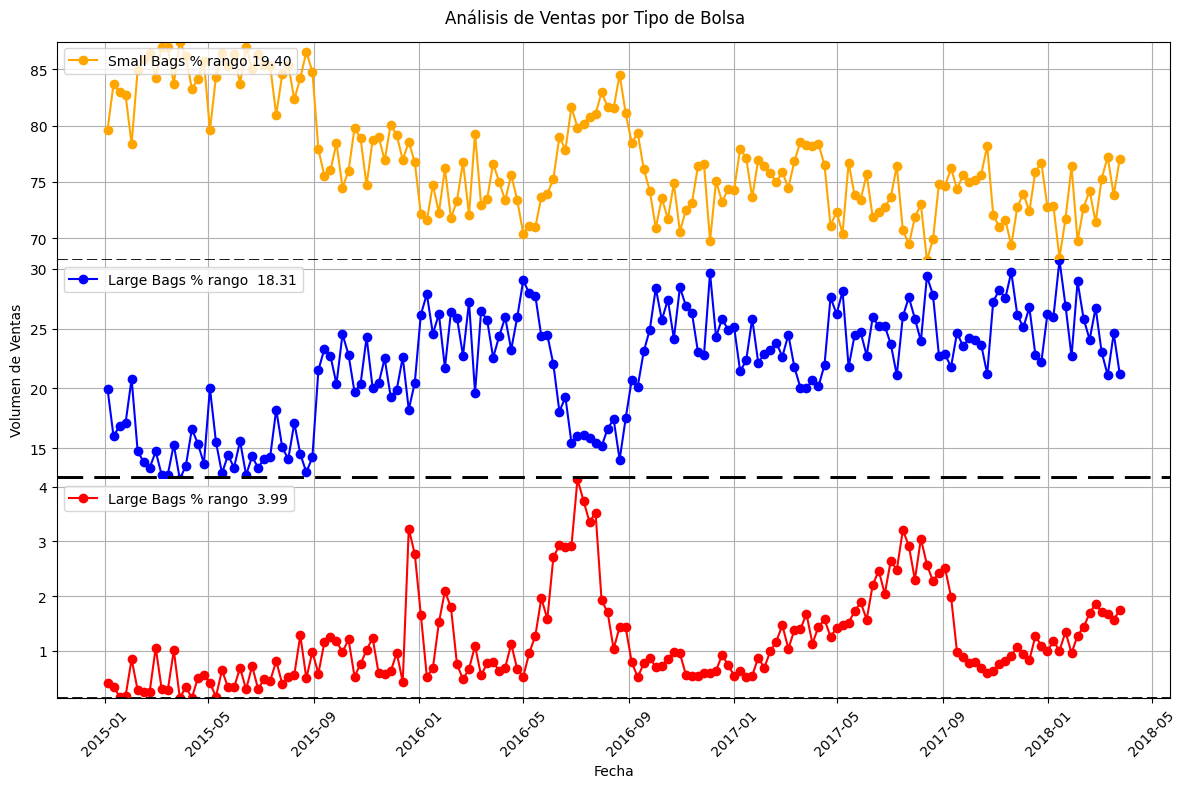

In [25]:
from IPython.display import display, HTML
display(HTML("<span style='font-size:20px; color:blue; font-style:italic;'>Grafica con 3 rangos distintos<BR> 1 a 4%<BR> 15 a 30%<BR> 70 a 85%</span>"))

P.P4.P4_3_CohortesTipoBolsaB(['Small Bags', 'Large Bags', 'XLarge Bags'],'SI')

4.4 | **Cohortes por Región y Fecha:** 
   
- **Uso de Datos:** Usa las columnas `Total Volume`, `Date` y `region`.
   - **Esperado:** Analiza el comportamiento de las cohortes según el volumen de ventas.
     - Clasifica los clientes según su volumen de compras.
     - Visualiza las cohortes en gráficos de líneas o barras que muestren el comportamiento de compra a lo largo del tiempo.


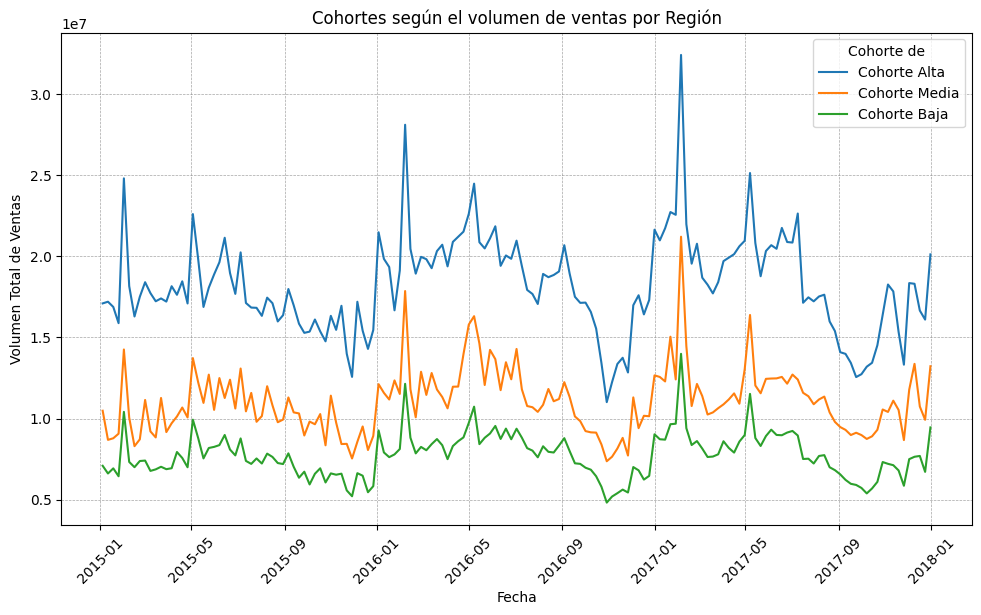

4.4 NOTAS: | <span style='font-size:16px; color:blue; font-style:italic;'>
 Este código analiza el volumen de ventas por región y clasifica las regiones en cohortes (Baja, Media y Alta) basadas en el promedio de sus ventas.
 - Después, genera una **gráfica de líneas que muestra cómo varía el volumen de ventas de cada cohorte a lo largo del tiempo**.

 **Agrupación de datos:**
 - Primero, agrupamos los datos por Date (fecha) y region para calcular el volumen total de ventas para cada combinación de estas dos variables.
  - Esto nos permite tener un total de ventas por región y por fecha.

 **Clasificación en cohortes:**

 - Calculamos el volumen promedio de ventas para cada región y, usando los cuartiles, clasificamos estas regiones en tres cohortes: Baja, Media y Alta.
 - Cada región se clasifica en una cohorte dependiendo de su volumen de ventas promedio, y esta información se agrega a nuestro DataFrame principal.

 **Creación de la gráfica:**

**Configuramos el título y los ejes de la gráfica.**
 - **Para cada cohorte, generamos una serie de datos que representa el total de ventas por fecha** y lo graficamos en líneas.
 - Esta visualización muestra la tendencia de ventas de cada cohorte en el tiempo, lo que puede ayudar a identificar patrones de comportamiento en los distintos grupos de clientes.


 **Conclusión**: Este análisis clasifica a las regiones en tres grupos (Baja, Media y Alta) según el volumen de ventas. Esto nos permite ver cómo cada grupo se comporta en el tiempo.

 - Las regiones de la cohorte Alta muestran ventas más estables y mayores, indicando un mercado sólido.
 - Las cohortes Baja y Media tienen menos ventas y más variación, lo que podría señalar oportunidades de crecimiento.</span>

In [26]:
P.PG.P4_4_CohortesClientesVentas()

4.5 | **Evaluación de Retención de Ventas por Cohorte:** 
   
- **Uso de Datos:** Usa las columnas `Total Volume` y `Date`.
   - **Esperado:** Estudia cómo se retienen las ventas en cohortes a lo largo de un año.
     - Agrupa los datos por mes y cohortes.
     - Calcula la retención de ventas y visualiza los resultados en un gráfico de líneas que muestre las tasas de retención.


4.5 NOTAS: | <span style='font-size:16px; color:blue; font-style:italic;'></span>

Datos de ventas agrupados por cohorte mensual.


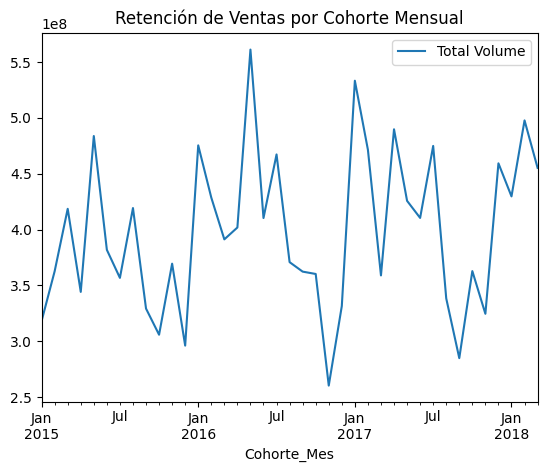

In [27]:
display(HTML("<span style='font-size:20px; color:red; font-style:italic;'>ERRONEO no se han definido Cohortes</span>"))
P.P4.P4_5_RetencionVentasCohorte()

5.1 | **Matriz de Correlación:** 
- **Uso de Datos:** Utiliza las columnas numéricas del DataFrame (p. ej., `AveragePrice`, `Total Volume`, `4046`, `4225`, `4770`, `Total Bags`).
   - **Esperado:** 
     - Importa las librerías necesarias: `import seaborn as sns` y `import matplotlib.pyplot as plt`.
     - Calcula la matriz de correlación usando el método `.corr()` del DataFrame.
     - Visualiza la matriz utilizando `sns.heatmap()`. 
     - Anota las correlaciones más significativas y discute su posible impacto en el análisis.


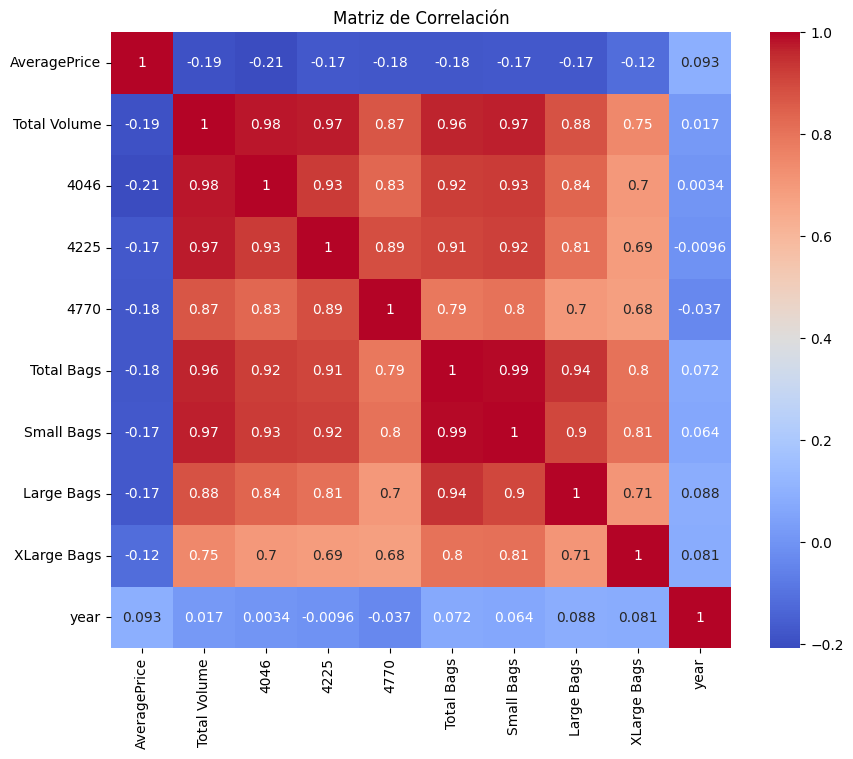

Correlaciones significativas encontradas:
              AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.192752 -0.208317 -0.172928 -0.179446   
Total Volume     -0.192752      1.000000  0.977863  0.974181  0.872202   
4046             -0.208317      0.977863  1.000000  0.926110  0.833389   
4225             -0.172928      0.974181  0.926110  1.000000  0.887855   
4770             -0.179446      0.872202  0.833389  0.887855  1.000000   
Total Bags       -0.177088      0.963047  0.920057  0.905787  0.792314   
Small Bags       -0.174730      0.967238  0.925280  0.916031  0.802733   
Large Bags       -0.172940      0.880640  0.838645  0.810015  0.698471   
XLarge Bags      -0.117592      0.747157  0.699377  0.688809  0.679861   
year              0.093197      0.017193  0.003353 -0.009559 -0.036531   

              Total Bags  Small Bags  Large Bags  XLarge Bags      year  
AveragePrice   -0.177088   -0.174730   -0.172940    -0.117592  0.0931

5.1 | **Matriz de Correlación:** 
- **Uso de Datos:** Utiliza las columnas numéricas del DataFrame (p. ej., `AveragePrice`, `Total Volume`, `4046`, `4225`, `4770`, `Total Bags`).
   - **Esperado:** 
     - Importa las librerías necesarias: `import seaborn as sns` y `import matplotlib.pyplot as plt`.
     - Calcula la matriz de correlación usando el método `.corr()` del DataFrame.
     - Visualiza la matriz utilizando `sns.heatmap()`. 
     - Anota las correlaciones más significativas y discute su posible impacto en el análisis.


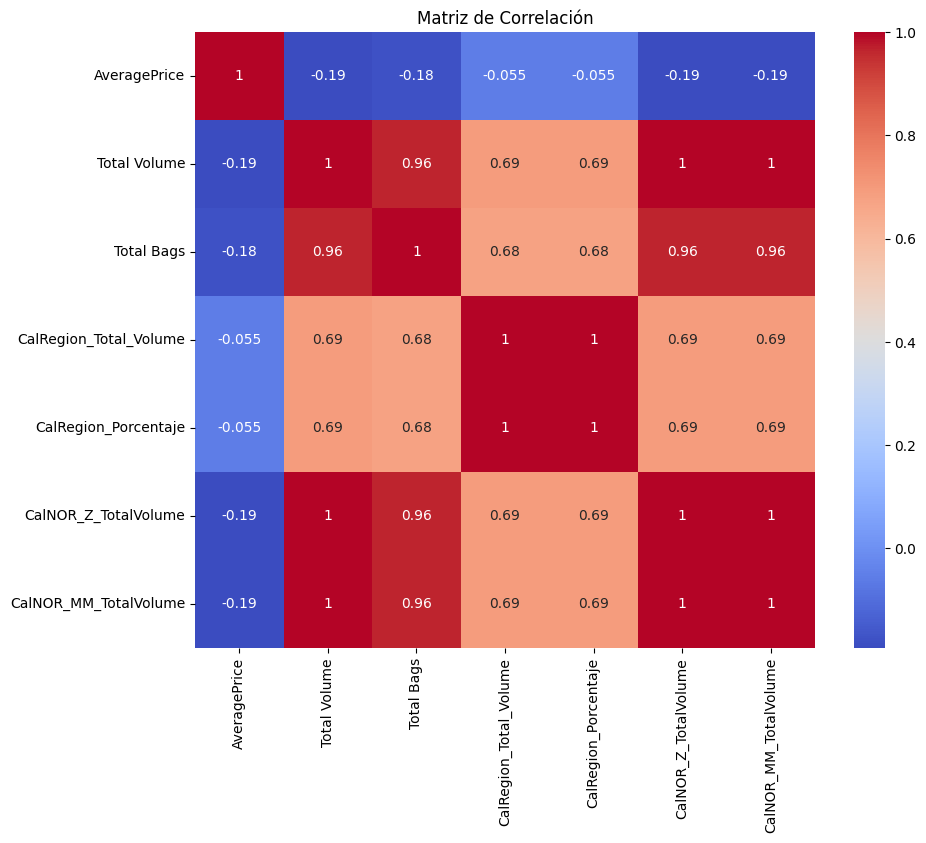

Correlaciones significativas encontradas:
                        AveragePrice  Total Volume  Total Bags  \
AveragePrice                1.000000     -0.192752   -0.177088   
Total Volume               -0.192752      1.000000    0.963047   
Total Bags                 -0.177088      0.963047    1.000000   
CalRegion_Total_Volume     -0.055110      0.694032    0.678409   
CalRegion_Porcentaje       -0.055110      0.694032    0.678409   
CalNOR_Z_TotalVolume       -0.192752      1.000000    0.963047   
CalNOR_MM_TotalVolume      -0.192752      1.000000    0.963047   

                        CalRegion_Total_Volume  CalRegion_Porcentaje  \
AveragePrice                         -0.055110             -0.055110   
Total Volume                          0.694032              0.694032   
Total Bags                            0.678409              0.678409   
CalRegion_Total_Volume                1.000000              1.000000   
CalRegion_Porcentaje                  1.000000              1.000000 

In [28]:
P.P5.P5_1_MatrizCorrelacion(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags','Large Bags','XLarge Bags','year'])
P.P5.P5_1_MatrizCorrelacion(['AveragePrice', 'Total Volume', 'Total Bags','CalRegion_Total_Volume','CalRegion_Porcentaje','CalNOR_Z_TotalVolume','CalNOR_MM_TotalVolume'])

5.2 | **Análisis de Dispersión entre Variables Clave:**
- **Uso de Datos:** Selecciona variables numéricas de interés como `AveragePrice` y `Total Volume`.
   - **Esperado:** 
     - Importa las librerías necesarias: `import seaborn as sns` y `import matplotlib.pyplot as plt`.
     - Crea un gráfico de dispersión con `sns.scatterplot()` para visualizar la relación entre `AveragePrice` y `Total Volume`.
     - Añade una línea de regresión utilizando `sns.regplot()` para ilustrar las tendencias.
     - Compara el ajuste de una regresión lineal frente a una polinómica.


5.2 NOTAS: | <span style='font-size:16px; color:blue; font-style:italic;'></span>

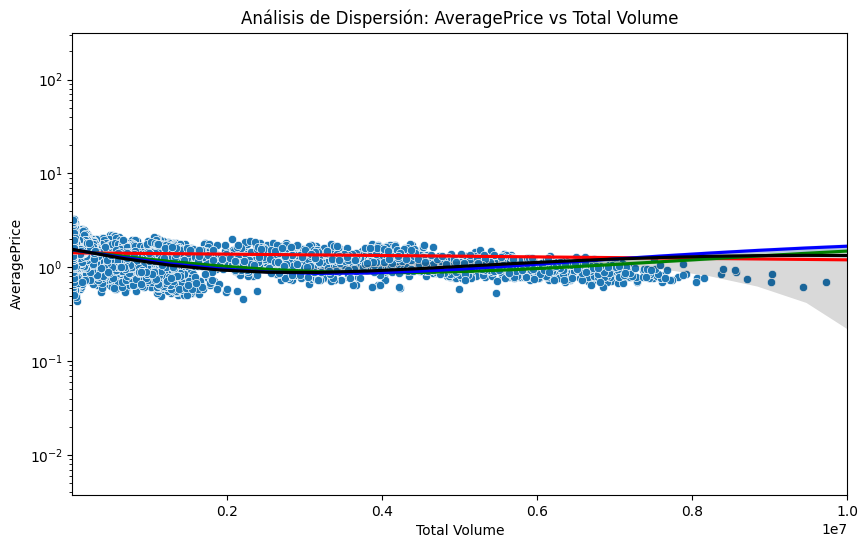

El gráfico muestra la relación entre AveragePrice y Total Volume.


5.2 | **Análisis de Dispersión entre Variables Clave:**
- **Uso de Datos:** Selecciona variables numéricas de interés como `AveragePrice` y `Total Volume`.
   - **Esperado:** 
     - Importa las librerías necesarias: `import seaborn as sns` y `import matplotlib.pyplot as plt`.
     - Crea un gráfico de dispersión con `sns.scatterplot()` para visualizar la relación entre `AveragePrice` y `Total Volume`.
     - Añade una línea de regresión utilizando `sns.regplot()` para ilustrar las tendencias.
     - Compara el ajuste de una regresión lineal frente a una polinómica.


5.2 NOTAS: | <span style='font-size:16px; color:blue; font-style:italic;'></span>

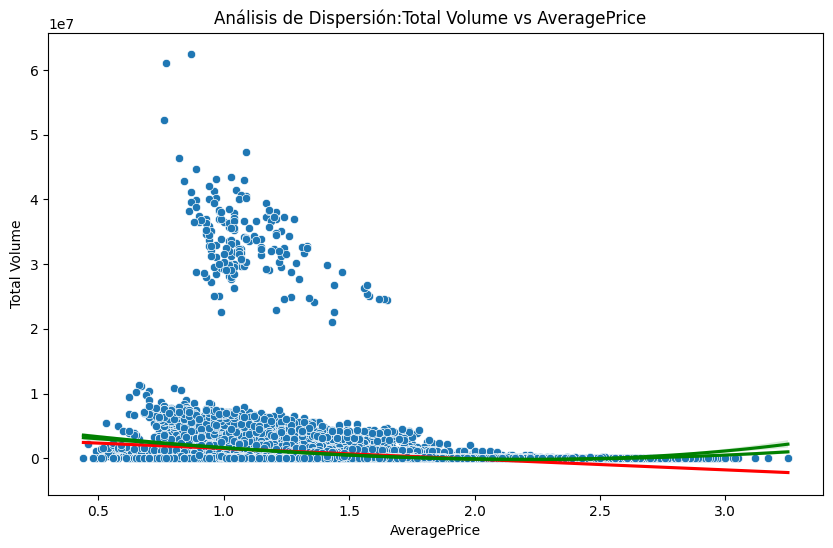

El gráfico muestra la relación entre Total Volume y AveragePrice.


In [29]:
P.P5.P5_2_AnalisisDispersión()
P.P5.P5_2_AnalisisDispersiónN()
#P.P5.Datos = P.DatosORG[(P.DatosORG['Total Volume'] < 10000000) ]
#P.P5.P5_2_AnalisisDispersión()
#P.P5.P5_2_AnalisisDispersiónN()


5.3 | **Predicciones Mensuales Usando Datos Trimestrales:**
- **Uso de Datos:** Agrupa datos por trimestres y segmenta en meses utilizando `Date`, `AveragePrice`, y `Total Volume`.
   - **Esperado:** 
     - Convierte la columna `Date` a tipo datetime si es necesario.
     - Agrupa los datos por trimestre y calcula el promedio de `AveragePrice` y `Total Volume`.
     - Utiliza los datos de los primeros 2 meses de un trimestre para predecir el precio del tercer mes.
     - Compara los resultados de las predicciones con los precios reales.
     - Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.


"<span style='font-size:20px; color:blue; font-style:italic;'>
**promedio_precio = (Datos_trimestrales['AveragePrice'][i] + Datos_trimestrales['AveragePrice'][i + 1]) / 2**
</span>
    


R²: -0.4491
RMSE: 0.1633


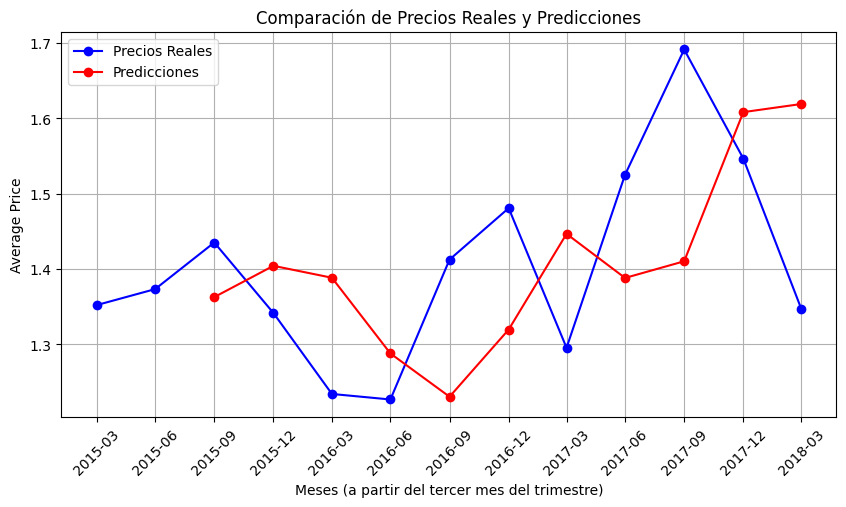

In [30]:
from IPython.display import display, HTML
P.P5.P5_3_PrediccionesMensuales()
#P.P5.Datos = P.DatosORG[(P.DatosORG['CalYear'].isin([2015])) ]
#P.P5.P5_3_PrediccionesMensuales()


In [31]:
P.P5.P5_4_PrediccionesTrimestrales()

5.4 | **Predicciones Trimestrales:**
- **Uso de Datos:** Agrupa los datos en trimestres usando solo variables numéricas.
   - **Esperado:** 
     - Agrupa los datos por trimestres usando `pd.Grouper()` con `freq='Q'` para obtener promedios.
     - Usa los datos de 1 o 2 trimestres anteriores para predecir el siguiente trimestre ajustando modelos de regresión lineal y polinómica.
     - Compara los resultados de las predicciones con los precios reales.
     - Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.


5.4 NOTAS: | <span style='font-size:16px; color:blue; font-style:italic;'></span>

Columna  PrediccionLineal  PrediccionPolinómica  \
0                         Unnamed: 0      1.752825e+01          1.780196e+01   
1                       AveragePrice      1.553227e+00          1.727789e+00   
2                       Total Volume      8.496285e+05          7.643467e+05   
3                               4046      2.583232e+05          2.889093e+05   
4                               4225      2.461011e+05          2.196353e+05   
5                               4770      1.373802e+04          1.896270e+03   
6                         Total Bags      3.314605e+05          2.538950e+05   
7                         Small Bags      2.421598e+05          1.860981e+05   
8                         Large Bags      8.401290e+04          6.425616e+04   
9                        XLarge Bags      5.287804e+03          3.540712e+03   
10                              year      2.017455e+03          2.017455e+03   
11                           CalYear      2.017455e+03          2.017455e+03   
12                          CalMonth      8.455360e+00          8.536443e+00   
13                        Cal_AAAAMM      2.017539e+05          2.017540e+05   
14                          Cal_AAAA      2.017455e+03          2.017455e+03   
15                            Cal_MM      8.455360e+00          8.536443e+00   
16                            Cal_SS      3.498418e+01          3.426674e+01   
17                           Cal_DDD      2.421841e+02          2.431591e+02   
18                       Cal_AAAADDD      2.017697e+06          2.017698e+06   
19              CalNOR_Z_TotalVolume     -2.940675e-04         -2.498871e-02   
20             CalNOR_MM_TotalVolume      1.359149e-02          1.222711e-02   
21            CalRegion_Total_Volume      2.875168e+08          2.875052e+08   
22              CalRegion_Porcentaje      1.852150e+00          1.852076e+00   
23  CalRegion_Acumulado_Total_Volume      1.367232e+10          1.367229e+10   
24    CalRegion_Acumulado_Porcentaje      8.807556e+01          8.807533e+01   

    R² Lineal  R² Polinómica    RMSE Lineal  RMSE Polinómica  Dif Pred_%  \
0    0.158762       0.156531      13.782732        13.801000       -1.56   
1    0.150246      -0.130552       0.116281         0.134124      -11.24   
2    0.019978      -0.180350  112757.622236    123746.683405       10.04   
3   -0.081619       0.153256   47447.501067     41980.965574      -11.84   
4    0.177452       0.007622   35125.899373     38582.042179       10.75   
5    0.295742       0.267818    7696.589799      7847.690420       86.20   
6    0.677459       0.618684   44572.458799     48463.661238       23.40   
7    0.616861       0.548821   33827.503290     36708.425347       23.15   
8    0.755788       0.717220   11519.142472     12395.411782       23.52   
9    0.499217       0.507335    1396.653259      1385.286123       33.04   
10   0.902784       0.902784       0.295698         0.295698        0.00   
11   0.902784       0.902784       0.295698         0.295698        0.00   
12  -0.064450      -0.071263       3.542025         3.553342       -0.96   
13   0.923660       0.923728      26.028043        26.016513       -0.00   
14   0.902784       0.902784       0.295698         0.295698        0.00   
15  -0.064450      -0.071263       3.542025         3.553342       -0.96   
16  -0.075715      -0.060111      14.763912        14.656442        2.05   
17  -0.064251      -0.066944     107.914103       108.050559       -0.40   
18   0.959484       0.959544     187.791892       187.652462       -0.00   
19   0.019978      -0.180350       0.032651         0.035833    -8397.61   
20   0.019978      -0.180350       0.001804         0.001980       10.04   
21  -0.001682       0.023636   58734.363605     57987.333363        0.00   
22  -0.001682       0.023636       0.000378         0.000374        0.00   
23  -0.001682       0.023636  181737.965195    179426.477546        0.00   
24  -0.001682       0.023636       0.001171     



### Interpretación de las diferencias en porcentaje:

   - **Interpr_Dif_Pred_%**: Indicador del cambio en la predicción.
        - `+.` : Cambio pequeño positivo en la predicción (< 5%)
        - `-.` : Cambio pequeño negativo en la predicción (< 5%)
        - `+M` : Cambio moderado positivo en la predicción (5% - 20%)
        - `-M` : Cambio moderado negativo en la predicción (5% - 20%)
        - `+S` : Cambio significativo positivo en la predicción (> 20%)
        - `-S` : Cambio significativo negativo en la predicción (> 20%)
        
   - **Interpr_Dif_R2_%**: Indica si el ajuste del modelo mejora o empeora.
        - ''  : Mejora el ajuste en el modelo polinómico
        - `+KO`: Empeora el ajuste en el modelo polinómico

   - **Interpr_Dif_RMSE_%**: Indica si hay un cambio notable en el error.
        - ''  : Mejora (disminuye el error) en el modelo polinómico
        - `+KO`: Empeora (aumenta el error) en el modelo polinómico
    

In [32]:
#P.P5.P5_5_PrediccionesAnuales(1)
P.P5.P5_5_PrediccionesAnuales(2)
mDes="""
## Análisis de Predicción y Precisión de Datos

### 1. Total Volume

#### Análisis con el año anterior:
- **Predicción Lineal:** 915,241.06
- **Predicción Polinómica:** 792,783.69
- **R² Lineal:** 0.468 (aproximadamente)
- **R² Polinómica:** -0.673 (aproximadamente)
- **RMSE Lineal:** 77,312.02
- **RMSE Polinómica:** 137,072.02

#### Análisis con dos años anteriores:
- **Predicción Lineal:** 1,013,206.96
- **Predicción Polinómica:** 1,245,386.56
- **R² Lineal:** 0.816 (aproximadamente)
- **R² Polinómica:** -0.216 (aproximadamente)
- **RMSE Lineal:** 45,509.37
- **RMSE Polinómica:** 116,842.41

### Interpretación para Total Volume:
- **Precisión y ajuste del modelo:** 
  - Con un año de datos anteriores, el modelo lineal tiene un **R² de 0.468**, lo que sugiere un ajuste moderado, mientras que el modelo polinómico presenta un **R² negativo (-0.673)**, indicando que el modelo polinómico no es adecuado para estos datos.
  - Con dos años de datos, el modelo lineal tiene un **R² de 0.816**, lo que indica un buen ajuste, mientras que el modelo polinómico sigue mostrando un **R² negativo (-0.216)**, lo que sugiere que este modelo es ineficaz.
  
- **Error medio cuadrático (RMSE):** 
  - El **RMSE** del modelo lineal con un año de datos es de 77,312.02, que es relativamente alto, lo que sugiere que las predicciones pueden tener un margen significativo de error.
  - Con dos años de datos, el **RMSE** disminuye a 45,509.37, lo que indica una mejora en la precisión de las predicciones.

### 2. Average Price

#### Análisis con el año anterior:
- **Predicción Lineal:** 1.5493
- **Predicción Polinómica:** 1.9051
- **R² Lineal:** -1.388 (aproximadamente)
- **R² Polinómica:** -14.361 (aproximadamente)
- **RMSE Lineal:** 0.1099
- **RMSE Polinómica:** 0.2788

#### Análisis con dos años anteriores:
- **Predicción Lineal:** 1.2647
- **Predicción Polinómica:** 1.1539
- **R² Lineal:** -1.590 (aproximadamente)
- **R² Polinómica:** -3.951 (aproximadamente)
- **RMSE Lineal:** 0.1145
- **RMSE Polinómica:** 0.1583

### Interpretación para Average Price:
- **Precisión y ajuste del modelo:** 
  - Ambos modelos (lineal y polinómico) presentan **R² negativos** en ambos casos, lo que indica que ninguno de los modelos se ajusta adecuadamente a los datos. Esto significa que las predicciones son muy poco fiables y que los modelos no están explicando la variación observada en los precios.
  
- **Error medio cuadrático (RMSE):** 
  - El **RMSE** es relativamente bajo para ambos modelos, lo que sugiere que, a pesar de la falta de ajuste, las predicciones no se desvían enormemente de los valores observados. Sin embargo, esto no debe considerarse una buena señal, ya que un modelo efectivo debería mostrar **R² positivos** junto con un **RMSE bajo**.

### Conclusiones Generales:
- Para **Total Volume**, el modelo lineal es más efectivo que el polinómico, especialmente cuando se utilizan dos años de datos anteriores, lo que mejora la precisión de las predicciones. Sin embargo, el **RMSE** aún sugiere que hay un margen de error considerable.
- Para **Average Price**, ambos modelos fallan en proporcionar un ajuste adecuado (R² negativos), lo que indica que otros factores pueden estar influyendo en el precio que no están siendo capturados por estos modelos.
- En general, podría ser beneficioso considerar otros enfoques de modelado o la inclusión de variables adicionales que puedan mejorar el ajuste de los modelos y, por ende, la calidad de las predicciones.
"""
from IPython.display import display, Markdown, HTML
display(Markdown(mDes))


5.5 | **Predicciones Anuales:**
- **Uso de Datos:** Agrupa los datos en años, utilizando únicamente columnas numéricas.
   - **Esperado:** 
     - Agrupa los datos por año utilizando `pd.Grouper()` con `freq='Y'`.
     - Usa los datos de 1 o 2 años anteriores para predecir el siguiente año ajustando modelos de regresión lineal y polinómica.
     - Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.


5.5 NOTAS: | <span style='font-size:16px; color:blue; font-style:italic;'></span>

- **parametros**:  
         - **anios_previos:**`2` 
    

sss


Columna  PrediccionLineal  PrediccionPolinómica  \
0                         Unnamed: 0      2.550908e+01          2.552271e+01   
1                       AveragePrice      1.264738e+00          1.153886e+00   
2                       Total Volume      1.013207e+06          1.245387e+06   
3                               4046      2.058155e+05          1.071875e+05   
4                               4225      2.662837e+05          2.189336e+05   
5                               4770      3.455198e+04          4.367699e+04   
6                         Total Bags      5.065557e+05          8.755884e+05   
7                         Small Bags      3.650091e+05          6.169848e+05   
8                         Large Bags      1.327812e+05          2.420421e+05   
9                        XLarge Bags      8.765431e+03          1.656147e+04   
10                              year      2.018000e+03          2.021000e+03   
11                           CalYear      2.018000e+03          2.021000e+03   
12                          CalMonth      6.290414e+00          6.062573e+00   
13                        Cal_AAAAMM      2.018063e+05          2.021061e+05   
14                          Cal_AAAA      2.018000e+03          2.021000e+03   
15                            Cal_MM      6.290414e+00          6.062573e+00   
16                            Cal_SS      2.656571e+01          2.663542e+01   
17                           Cal_DDD      1.795561e+02          1.766402e+02   
18                       Cal_AAAADDD      2.018180e+06          2.021177e+06   
19              CalNOR_Z_TotalVolume      4.707261e-02          1.143038e-01   
20             CalNOR_MM_TotalVolume      1.620852e-02          1.992306e-02   
21            CalRegion_Total_Volume      2.874195e+08          2.873431e+08   
22              CalRegion_Porcentaje      1.851524e+00          1.851032e+00   
23  CalRegion_Acumulado_Total_Volume      1.367202e+10          1.367179e+10   
24    CalRegion_Acumulado_Porcentaje      8.807362e+01          8.807210e+01   

    R² Lineal  R² Polinómica    RMSE Lineal  RMSE Polinómica  
0   -0.313239      -0.315012      10.007499        10.014254  
1   -1.590135      -3.951547       0.114467         0.158267  
2    0.815582      -0.215636   45509.372957    116842.406483  
3   -5.347641     -16.479564   78827.813135    130809.289479  
4   -0.906431      -6.039482   24918.405723     47882.851631  
5   -3.840865      -8.390500   11473.308139     15979.806722  
6    0.149227      -8.860750   79663.634776    271211.598680  
7    0.133860      -8.897763   54858.120203    185445.135131  
8    0.207570      -8.586687   22948.313678     79818.696809  
9   -0.271047     -11.747962    1880.376405      5955.034703  
10   1.000000      -1.000000       0.000000         1.581139  
11   1.000000      -1.000000       0.000000         1.581139  
12  -0.215373      -0.091900       2.146738         2.034771  
13   0.999621      -1.104172       2.146738       160.005070  
14   1.000000      -1.000000       0.000000         1.581139  
15  -0.215373      -0.091900       2.146738         2.034771  
16  -0.320121      -0.329240      10.035260        10.069862  
17  -0.280241      -0.225583      67.039478        65.592779  
18   0.996096      -1.344848      67.039478      1642.951308  
19   0.815582      -0.215636       0.013178         0.033834  
20   0.815582      -0.215636       0.000728         0.001869  
21  -3.807812     -14.315685   45500.331493     81209.912243  
22  -3.807812     -14.315685       0.000293         0.000523  
23  -3.807812     -14.315685  140788.750463    251282.610359  
24  -3.807812     -14.315685       0.000907         0.001619

Resultados exportados a: P5_5_PrediccionesAnuales



## Análisis de Predicción y Precisión de Datos

### 1. Total Volume

#### Análisis con el año anterior:
- **Predicción Lineal:** 915,241.06
- **Predicción Polinómica:** 792,783.69
- **R² Lineal:** 0.468 (aproximadamente)
- **R² Polinómica:** -0.673 (aproximadamente)
- **RMSE Lineal:** 77,312.02
- **RMSE Polinómica:** 137,072.02

#### Análisis con dos años anteriores:
- **Predicción Lineal:** 1,013,206.96
- **Predicción Polinómica:** 1,245,386.56
- **R² Lineal:** 0.816 (aproximadamente)
- **R² Polinómica:** -0.216 (aproximadamente)
- **RMSE Lineal:** 45,509.37
- **RMSE Polinómica:** 116,842.41

### Interpretación para Total Volume:
- **Precisión y ajuste del modelo:** 
  - Con un año de datos anteriores, el modelo lineal tiene un **R² de 0.468**, lo que sugiere un ajuste moderado, mientras que el modelo polinómico presenta un **R² negativo (-0.673)**, indicando que el modelo polinómico no es adecuado para estos datos.
  - Con dos años de datos, el modelo lineal tiene un **R² de 0.816**, lo que indica un buen ajuste, mientras que el modelo polinómico sigue mostrando un **R² negativo (-0.216)**, lo que sugiere que este modelo es ineficaz.
  
- **Error medio cuadrático (RMSE):** 
  - El **RMSE** del modelo lineal con un año de datos es de 77,312.02, que es relativamente alto, lo que sugiere que las predicciones pueden tener un margen significativo de error.
  - Con dos años de datos, el **RMSE** disminuye a 45,509.37, lo que indica una mejora en la precisión de las predicciones.

### 2. Average Price

#### Análisis con el año anterior:
- **Predicción Lineal:** 1.5493
- **Predicción Polinómica:** 1.9051
- **R² Lineal:** -1.388 (aproximadamente)
- **R² Polinómica:** -14.361 (aproximadamente)
- **RMSE Lineal:** 0.1099
- **RMSE Polinómica:** 0.2788

#### Análisis con dos años anteriores:
- **Predicción Lineal:** 1.2647
- **Predicción Polinómica:** 1.1539
- **R² Lineal:** -1.590 (aproximadamente)
- **R² Polinómica:** -3.951 (aproximadamente)
- **RMSE Lineal:** 0.1145
- **RMSE Polinómica:** 0.1583

### Interpretación para Average Price:
- **Precisión y ajuste del modelo:** 
  - Ambos modelos (lineal y polinómico) presentan **R² negativos** en ambos casos, lo que indica que ninguno de los modelos se ajusta adecuadamente a los datos. Esto significa que las predicciones son muy poco fiables y que los modelos no están explicando la variación observada en los precios.
  
- **Error medio cuadrático (RMSE):** 
  - El **RMSE** es relativamente bajo para ambos modelos, lo que sugiere que, a pesar de la falta de ajuste, las predicciones no se desvían enormemente de los valores observados. Sin embargo, esto no debe considerarse una buena señal, ya que un modelo efectivo debería mostrar **R² positivos** junto con un **RMSE bajo**.

### Conclusiones Generales:
- Para **Total Volume**, el modelo lineal es más efectivo que el polinómico, especialmente cuando se utilizan dos años de datos anteriores, lo que mejora la precisión de las predicciones. Sin embargo, el **RMSE** aún sugiere que hay un margen de error considerable.
- Para **Average Price**, ambos modelos fallan en proporcionar un ajuste adecuado (R² negativos), lo que indica que otros factores pueden estar influyendo en el precio que no están siendo capturados por estos modelos.
- En general, podría ser beneficioso considerar otros enfoques de modelado o la inclusión de variables adicionales que puedan mejorar el ajuste de los modelos y, por ende, la calidad de las predicciones.


In [33]:
P.P5.P5_6_Modelos_Regresión_Múltiple()

5.6 | Desarrollo de Modelos de Regresión Múltiple:** 
- **Uso de Datos:** Selecciona varias variables numéricas como `Total Volume`, `4046`, `4225`, `4770`, y `Total Bags` para predecir `AveragePrice`.
   - **Esperado:** 
     - Define las variables independientes (X) y dependientes (y).
     - Ajusta modelos de regresión múltiple.
     - Compara su rendimiento utilizando métricas como R² y RMSE y discute las implicaciones de los resultados.


5.6 NOTAS: | <span style='font-size:16px; color:blue; font-style:italic;'></span>

Resultados del Modelo de Regresión Múltiple:
R²: 0.0505
RMSE: 0.3924

Coeficientes del Modelo:
               Coeficiente
Total Volume  1.606633e-04
4046         -1.607770e-04
4225         -1.606010e-04
4770         -1.610560e-04
Large Bags   -1.954693e-07
Total Bags   -1.605908e-04

Implicaciones:
El modelo tiene un ajuste bajo, lo que sugiere que las variables seleccionadas no explican bien la variabilidad de AveragePrice.


In [34]:
P.P5.P5_7_CoefficientsRegresionMultiple()

5.7 | **Análisis de Coeficientes de Regresión Múltiple:**
- **Uso de Datos:** Examina los coeficientes de los modelos de regresión múltiple ajustados.
   - **Esperado:** 
     - Extrae los coeficientes del modelo ajustado.
     - Interpreta los coeficientes para entender el impacto de cada variable numérica en `AveragePrice`.
     - Comenta sobre las variables más significativas y su relevancia.


5.7 NOTAS: | <span style='font-size:16px; color:blue; font-style:italic;'></span>

Análisis de Coeficientes de Regresión Múltiple:
               Coeficiente Interpretación
Total Volume  1.606633e-04        Aumenta
4046         -1.607770e-04      Disminuye
4225         -1.606010e-04      Disminuye
4770         -1.610560e-04      Disminuye
Large Bags   -1.954693e-07      Disminuye
Total Bags   -1.605908e-04      Disminuye

Variables más significativas:
Empty DataFrame
Columns: [Coeficiente, Interpretación]
Index: []

Comentarios sobre las variables:


In [35]:
P.P5.P5_8_VolumenVentas()
P.P5.P5_8_Regresion_VolumenVentas()

5.8 | **Modelos de Regresión para Diferenciar Volúmenes de Ventas:**
- **Uso de Datos:** Usa `AveragePrice`, `Total Volume`, `4046`, `4225`, y `4770`.
   - **Esperado:** 
     - Ajusta modelos de regresión para analizar cómo los diferentes volúmenes de ventas afectan `AveragePrice`.
     - Compara los resultados de regresión lineal y polinómica.
     - Presenta las conclusiones de tus análisis.


5.8 NOTAS: | <span style='font-size:16px; color:blue; font-style:italic;'></span>

Modelo Lineal - MSE: 0.15423855096656056, R²: 0.04872946398965827


5.8 | **Modelos de Regresión para Diferenciar Volúmenes de Ventas:**
- **Uso de Datos:** Usa `AveragePrice`, `Total Volume`, `4046`, `4225`, y `4770`.
   - **Esperado:** 
     - Ajusta modelos de regresión para analizar cómo los diferentes volúmenes de ventas afectan `AveragePrice`.
     - Compara los resultados de regresión lineal y polinómica.
     - Presenta las conclusiones de tus análisis.


5.8 NOTAS: | <span style='font-size:16px; color:blue; font-style:italic;'></span>

Resultados de la Regresión Lineal:
Error Cuadrático Medio (MSE): 0.1542
Coeficiente de Determinación (R^2): 0.0400

Resultados de la Regresión Polinómica (Grado 2):
Error Cuadrático Medio (MSE): 0.1559
Coeficiente de Determinación (R^2): 0.0297

El modelo de regresión lineal proporciona un ajuste comparable o mejor que el modelo polinómico para estos datos.


In [36]:
P.P5.P5_9_AnalisisInfluenciaVentas()

5.9 | **Análisis de la Influencia de las Ventas Totales en el Precio Promedio:**
- **Uso de Datos:** Usa `Total Volume`, `AveragePrice`, y `Total Bags`.
   - **Esperado:** 
     - Ajusta un modelo de regresión lineal y polinómica para ver cómo varía `AveragePrice` en función del volumen total de ventas.
     - Evalúa la significancia de los coeficientes y discute su relevancia.


5.9 NOTAS: | <span style='font-size:16px; color:blue; font-style:italic;'></span>

Resultados del Modelo de Regresión Lineal:
                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     361.9
Date:                Mon, 18 Nov 2024   Prob (F-statistic):          7.08e-155
Time:                        17:12:40   Log-Likelihood:                -8939.0
No. Observations:               18249   AIC:                         1.788e+04
Df Residuals:                   18246   BIC:                         1.791e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const

In [37]:
P.P5.P5_10_RegresionPrecioPromedioPorTipo()

5.10 | **Regresión para Predecir el Precio Promedio Según el Volumen de Aguacates por Tipo:**
- **Uso de Datos:** Usa `AveragePrice`, `4046`, `4225`, `4770`, y `Total Volume`.
    - **Esperado:** 
      - Ajusta modelos de regresión lineal y polinómica.
      - Evalúa la efectividad de ambos modelos utilizando métricas como R² y RMSE.
      - Discute cuál modelo ofrece mejores predicciones y por qué, basándote en los resultados obtenidos.


5.10 NOTAS: | <span style='font-size:16px; color:blue; font-style:italic;'></span>

Resultados del Modelo de Regresión Lineal:
                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     233.6
Date:                Mon, 18 Nov 2024   Prob (F-statistic):          5.47e-196
Time:                        17:12:40   Log-Likelihood:                -8838.2
No. Observations:               18249   AIC:                         1.769e+04
Df Residuals:                   18244   BIC:                         1.773e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const